##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image classification

<table class="tfo-notebook-buttons" align="left">
  <td>     <a target="_blank" href="https://www.tensorflow.org/tutorials/images/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org で表示</a> </td>
  <td>     <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab で実行</a> </td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png"> GitHub でソースを表示</a></td>
  <td>     <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/tutorials/images/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">ノートブックをダウンロード</a> </td>
</table>

このチュートリアルでは、`tf.keras.Sequential` モデルを使用して花の画像を分類し、`tf.keras.utils.image_dataset_from_directory` を使用してデータを読み込む方法を示します。このチュートリアルでは、次の概念を実際に見ていきます。

- ディスク上のデータセットを効率的に読み込みます。
- 過学習を識別し、データ拡張やドロップアウトなどテクニックを使用して過学習を防ぎます。

このチュートリアルは、基本的な機械学習のワークフローに従います。

1. データの調査及び理解
2. 入力パイプラインの構築
3. モデルの構築
4. モデルの学習
5. モデルのテスト
6. モデルの改善とプロセスの繰り返し

さらに、このノートブックは、[保存されたモデル](../../../guide/saved_model.ipynb)を、モバイルデバイス、組み込みデバイス、IoT デバイスでのオンデバイス機械学習用の [TensorFlow Lite](https://www.tensorflow.org/lite/) モデルに変換する方法を実演します。

## セットアップ

TensorFlow とその他の必要なライブラリをインポートします。

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-01-11 22:28:47.421235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 22:28:47.421277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 22:28:47.422793: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## データセットをダウンロードして調査する

このチュートリアルでは、約3,700枚の花の写真のデータセットを使用します。データセットには、クラスごとに1つずつ、5 つのサブディレクトリが含まれています。

```
flower_photo/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
```

In [3]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

     8192/228813984 [..............................] - ETA: 0s

  8396800/228813984 [>.............................] - ETA: 2s

 19243008/228813984 [=>............................] - ETA: 1s

 27983872/228813984 [==>...........................] - ETA: 1s

 39141376/228813984 [====>.........................] - ETA: 1s

 49414144/228813984 [=====>........................] - ETA: 1s

 60465152/228813984 [======>.......................] - ETA: 0s

 68018176/228813984 [=======>......................] - ETA: 0s

 77029376/228813984 [=========>....................] - ETA: 0s

 83525632/228813984 [=========>....................] - ETA: 0s

 94896128/228813984 [===========>..................] - ETA: 0s

104398848/228813984 [============>.................] - ETA: 0s

114163712/228813984 [=============>................] - ETA: 0s

121430016/228813984 [==============>...............] - ETA: 0s

131588096/228813984 [================>.............] - ETA: 0s

143597568/228813984 [=================>............] - ETA: 0s

154443776/228813984 [===================>..........] - ETA: 0s

164323328/228813984 [====================>.........] - ETA: 0s

176193536/228813984 [======================>.......] - ETA: 0s

189128704/228813984 [=======================>......] - ETA: 0s

200892416/228813984 [=========================>....] - ETA: 0s

213917696/228813984 [===========================>..] - ETA: 0s

226140160/228813984 [============================>.] - ETA: 0s

228813984/228813984 [==============================] - 1s 0us/step


ダウンロード後、データセットのコピーが利用できるようになります。合計3,670枚の画像があります。

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


バラの画像です。

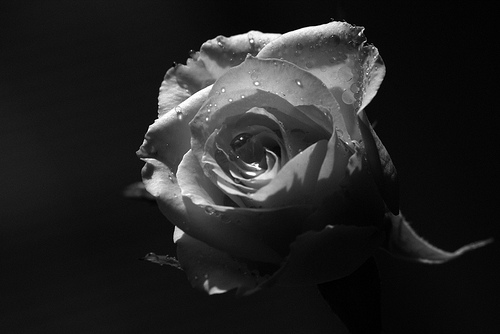

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

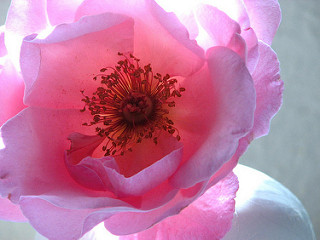

In [6]:
PIL.Image.open(str(roses[1]))

チューリップの画像です。

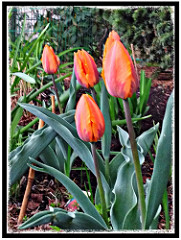

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

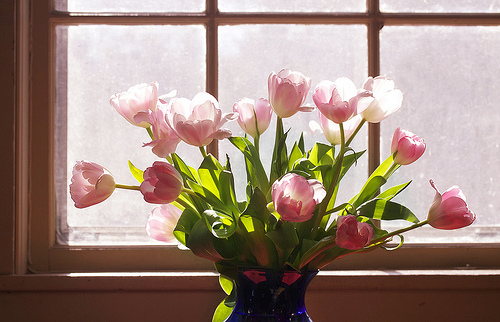

In [8]:
PIL.Image.open(str(tulips[1]))

## Keras ユーティリティを使用してデータを読み込む

次に、便利な <a>image_dataset_from_directory</a> ユーティリティを使用して、これらの画像をディスクから読み込みます。これにより、数行のコードでディスク上の画像のディレクトリから `tf.data.Dataset`に移動します。また、[画像を読み込んで前処理する](../load_data/images.ipynb)チュートリアルにアクセスして、独自のデータ読み込みコードを最初から作成することもできます。

### データセットを作成する

ローダーのいくつかのパラメーターを定義します。

In [9]:
batch_size = 32
img_height = 180
img_width = 180

モデルを開発するときは、検証分割を使用することをお勧めします。ここでは、画像の 80％ をトレーニングに使用し、20％ を検証に使用します。

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.


Using 2936 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.


Using 734 files for validation.


クラス名は、これらのデータセットの`class_names`属性にあります。 これらはアルファベット順にディレクトリ名に対応します。

In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## データを視覚化する

以下はトレーニングデータセットの最初の 9 枚の画像です。

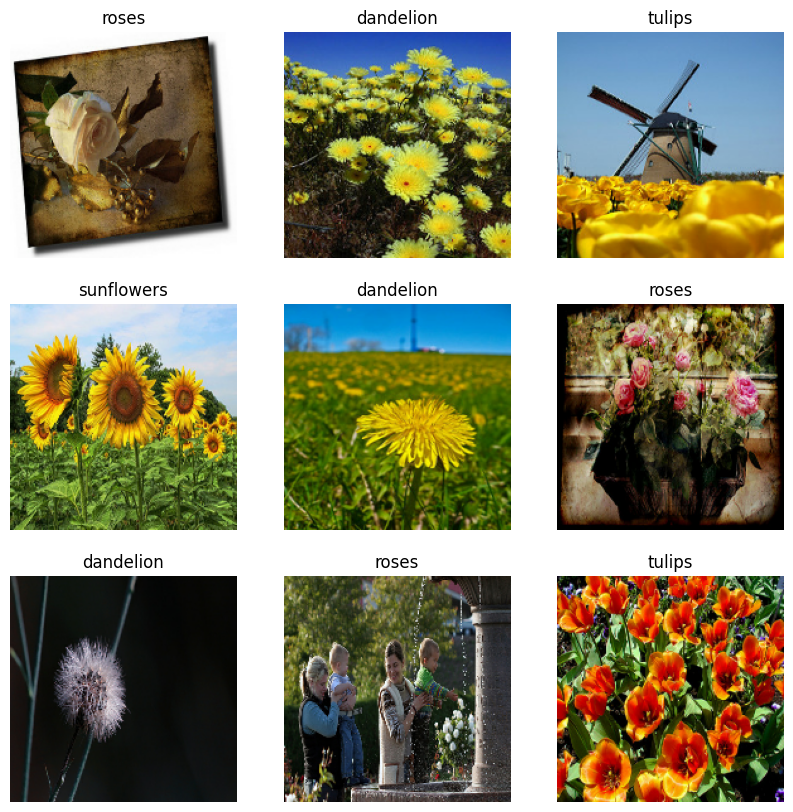

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

これらのデータセットを Keras `Model.fit` に渡すことで、モデルをトレーニングできます（このチュートリアルの後の方で説明しています）。また、手動でデータセットを反復し、画像のバッチを取得することもできます。

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


`image_batch`は、形状`(32, 180, 180, 3)`のテンソルです。これは、形状`180x180x3`の 32 枚の画像のバッチです（最後の次元はカラーチャンネル RGB を参照します）。`label_batch`は、形状`(32,)`のテンソルであり、これらは 32 枚の画像に対応するラベルです。

`image_batch`および`labels_batch`テンソルで`.numpy()`を呼び出して、それらを`numpy.ndarray`に変換できます。


## データセットを構成してパフォーマンスを改善する

I/O がブロックされることなくディスクからデータを取得できるように、必ずバッファ付きプリフェッチを使用します。これらは、データを読み込むときに使用する必要がある 2 つの重要な方法です。

- `Dataset.cache()`は、最初のエポック中に画像をディスクから読み込んだ後、メモリに保持します。これにより、モデルのトレーニング中にデータセットがボトルネックになることを回避できます。データセットが大きすぎてメモリに収まらない場合は、この方法を使用して、パフォーマンスの高いオンディスクキャッシュを作成することもできます。
- `Dataset.prefetch` はトレーニング中にデータの前処理とモデルの実行をオーバーラップさせます。

以上の 2 つの方法とデータをディスクにキャッシュする方法についての詳細は、<a>データパフォーマンスガイド</a>の <em>プリフェッチ</em>を参照してください。

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## データを標準化する

RGB チャネル値は `[0, 255]` の範囲にあり、ニューラルネットワークには理想的ではありません。一般に、入力値は小さくする必要があります。

ここでは、`tf.keras.layers.Rescaling` を使用して、値を `[0, 1]` の範囲に標準化します。

In [16]:
normalization_layer = layers.Rescaling(1./255)

このレイヤーを使用するには 2 つの方法があります。`Dataset.map` を呼び出すことにより、データセットに適用できます。

In [17]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


または、モデル定義内にレイヤーを含めることができます。これにより、デプロイメントを簡素化できます。 ここでは 2 番目のアプローチを使用します。

注意: 以前は、`tf.keras.utils.image_dataset_from_directory` の `image_size` 引数を使用して画像のサイズを変更しました。モデルにサイズ変更ロジックも含める場合は、`tf.keras.layers.Resizing` レイヤーを使用できます。

## 基本的な Keras モデル

### モデルを作成する

[Sequential](https://www.tensorflow.org/guide/keras/sequential_model) モデルは、それぞれに最大プールレイヤー （`tf.keras.layers.MaxPooling2D`）を持つ 3 つの畳み込みブロック（`tf.keras.layers.Conv2D`）で構成されます。ReLU 活性化関数（`'relu'`）により活性化されたユニットが 128 個ある完全に接続されたレイヤー （`tf.keras.layers.Dense`）があります。このチュートリアルの目的は、標準的なアプローチを示すことなので、このモデルは高精度に調整されていません。

In [18]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### モデルをコンパイルする

このチュートリアルでは、`tf.keras.optimizers.Adam` オプティマイザと`tf.keras.losses.SparseCategoricalCrossentropy` 損失関数を選択します。各トレーニングエポックのトレーニングと検証の精度を表示するには、`Model.compile` に `metrics` 引数を渡します。

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### モデルの概要

Keras の `Model.summary` メソッドを使用して、ネットワークのすべてのレイヤーを表示します。

In [20]:
model.summary()

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         


 conv2d (Conv2D)             (None, 180, 180, 16)      448       


 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         


 D)                                                              


 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      


 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         


 g2D)                                                            


 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     


 max_pooling2d_2 (MaxPoolin  (None, 22, 22, 64)        0         


 g2D)                                                            


 flatten (Flatten)           (None, 30976)             0         


 dense (Dense)               (None, 128)               3965056   


 dense_1 (Dense)             (None, 5)                 645       


Total params: 3989285 (15.22 MB)


Trainable params: 3989285 (15.22 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


### モデルをトレーニングする

Keras `Model.fit` メソッドを使用して、10 エポックのモデルをトレーニングします。

In [21]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


I0000 00:00:1705012140.129092 1029321 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 1/92 [..............................] - ETA: 5:21 - loss: 1.6652 - accuracy: 0.0938

 4/92 [>.............................] - ETA: 1s - loss: 2.2735 - accuracy: 0.1797  

 7/92 [=>............................] - ETA: 1s - loss: 2.0028 - accuracy: 0.2009

10/92 [==>...........................] - ETA: 1s - loss: 1.9042 - accuracy: 0.1969

13/92 [===>..........................] - ETA: 1s - loss: 1.8261 - accuracy: 0.2163

16/92 [====>.........................] - ETA: 1s - loss: 1.7759 - accuracy: 0.2227

19/92 [=====>........................] - ETA: 1s - loss: 1.7441 - accuracy: 0.2368

22/92 [======>.......................] - ETA: 1s - loss: 1.7045 - accuracy: 0.2557

25/92 [=======>......................] - ETA: 1s - loss: 1.6729 - accuracy: 0.2688

28/92 [========>.....................] - ETA: 1s - loss: 1.6526 - accuracy: 0.2824

31/92 [=========>....................] - ETA: 1s - loss: 1.6318 - accuracy: 0.2833

34/92 [==========>...................] - ETA: 1s - loss: 1.6022 - accuracy: 0.3006

37/92 [===========>..................] - ETA: 1s - loss: 1.5863 - accuracy: 0.3091

39/92 [===========>..................] - ETA: 2s - loss: 1.5757 - accuracy: 0.3105

42/92 [============>.................] - ETA: 1s - loss: 1.5592 - accuracy: 0.3189

45/92 [=============>................] - ETA: 1s - loss: 1.5386 - accuracy: 0.3275

48/92 [==============>...............] - ETA: 1s - loss: 1.5185 - accuracy: 0.3351

51/92 [===============>..............] - ETA: 1s - loss: 1.4955 - accuracy: 0.3436

54/92 [================>.............] - ETA: 1s - loss: 1.4701 - accuracy: 0.3535

57/92 [=================>............] - ETA: 1s - loss: 1.4531 - accuracy: 0.3640

60/92 [==================>...........] - ETA: 1s - loss: 1.4349 - accuracy: 0.3734

63/92 [===================>..........] - ETA: 0s - loss: 1.4255 - accuracy: 0.3825

66/92 [====================>.........] - ETA: 0s - loss: 1.4132 - accuracy: 0.3864

69/92 [=====================>........] - ETA: 0s - loss: 1.3992 - accuracy: 0.3945

72/92 [======================>.......] - ETA: 0s - loss: 1.3925 - accuracy: 0.3981

75/92 [=======================>......] - ETA: 0s - loss: 1.3824 - accuracy: 0.4038

78/92 [========================>.....] - ETA: 0s - loss: 1.3782 - accuracy: 0.4072

81/92 [=========================>....] - ETA: 0s - loss: 1.3699 - accuracy: 0.4129

84/92 [==========================>...] - ETA: 0s - loss: 1.3600 - accuracy: 0.4175

87/92 [===========================>..] - ETA: 0s - loss: 1.3543 - accuracy: 0.4207

90/92 [============================>.] - ETA: 0s - loss: 1.3445 - accuracy: 0.4241

92/92 [==============================] - 7s 35ms/step - loss: 1.3368 - accuracy: 0.4268 - val_loss: 1.1183 - val_accuracy: 0.5422


Epoch 2/10


 1/92 [..............................] - ETA: 1s - loss: 0.9989 - accuracy: 0.6250

 4/92 [>.............................] - ETA: 1s - loss: 1.0665 - accuracy: 0.6016

 7/92 [=>............................] - ETA: 1s - loss: 1.0228 - accuracy: 0.5804

10/92 [==>...........................] - ETA: 1s - loss: 1.0440 - accuracy: 0.5688

13/92 [===>..........................] - ETA: 1s - loss: 1.0557 - accuracy: 0.5721

16/92 [====>.........................] - ETA: 1s - loss: 1.0721 - accuracy: 0.5684

19/92 [=====>........................] - ETA: 1s - loss: 1.0545 - accuracy: 0.5850

22/92 [======>.......................] - ETA: 1s - loss: 1.0429 - accuracy: 0.5991

25/92 [=======>......................] - ETA: 1s - loss: 1.0441 - accuracy: 0.6035

28/92 [========>.....................] - ETA: 1s - loss: 1.0350 - accuracy: 0.6025

31/92 [=========>....................] - ETA: 1s - loss: 1.0265 - accuracy: 0.5996

34/92 [==========>...................] - ETA: 1s - loss: 1.0211 - accuracy: 0.6028

37/92 [===========>..................] - ETA: 1s - loss: 1.0304 - accuracy: 0.6012

40/92 [============>.................] - ETA: 0s - loss: 1.0155 - accuracy: 0.6077

43/92 [=============>................] - ETA: 0s - loss: 1.0167 - accuracy: 0.6104

46/92 [==============>...............] - ETA: 0s - loss: 1.0197 - accuracy: 0.6086

49/92 [==============>...............] - ETA: 0s - loss: 1.0209 - accuracy: 0.6083

52/92 [===============>..............] - ETA: 0s - loss: 1.0113 - accuracy: 0.6105

55/92 [================>.............] - ETA: 0s - loss: 1.0037 - accuracy: 0.6164

58/92 [=================>............] - ETA: 0s - loss: 1.0080 - accuracy: 0.6153

61/92 [==================>...........] - ETA: 0s - loss: 1.0056 - accuracy: 0.6142

64/92 [===================>..........] - ETA: 0s - loss: 1.0096 - accuracy: 0.6113

67/92 [====================>.........] - ETA: 0s - loss: 1.0064 - accuracy: 0.6119

70/92 [=====================>........] - ETA: 0s - loss: 1.0077 - accuracy: 0.6111

73/92 [======================>.......] - ETA: 0s - loss: 1.0022 - accuracy: 0.6130

76/92 [=======================>......] - ETA: 0s - loss: 0.9977 - accuracy: 0.6176

79/92 [========================>.....] - ETA: 0s - loss: 0.9930 - accuracy: 0.6206

82/92 [=========================>....] - ETA: 0s - loss: 0.9848 - accuracy: 0.6250

85/92 [==========================>...] - ETA: 0s - loss: 0.9786 - accuracy: 0.6272

88/92 [===========================>..] - ETA: 0s - loss: 0.9795 - accuracy: 0.6264

91/92 [============================>.] - ETA: 0s - loss: 0.9827 - accuracy: 0.6240

92/92 [==============================] - 2s 21ms/step - loss: 0.9825 - accuracy: 0.6250 - val_loss: 0.9808 - val_accuracy: 0.6076


Epoch 3/10


 1/92 [..............................] - ETA: 1s - loss: 0.8039 - accuracy: 0.6562

 4/92 [>.............................] - ETA: 1s - loss: 0.7281 - accuracy: 0.7266

 7/92 [=>............................] - ETA: 1s - loss: 0.7282 - accuracy: 0.7321

10/92 [==>...........................] - ETA: 1s - loss: 0.7458 - accuracy: 0.7219

13/92 [===>..........................] - ETA: 1s - loss: 0.7506 - accuracy: 0.7091

16/92 [====>.........................] - ETA: 1s - loss: 0.7644 - accuracy: 0.6895

19/92 [=====>........................] - ETA: 1s - loss: 0.7668 - accuracy: 0.7007

22/92 [======>.......................] - ETA: 1s - loss: 0.7650 - accuracy: 0.7060

25/92 [=======>......................] - ETA: 1s - loss: 0.7570 - accuracy: 0.7138

28/92 [========>.....................] - ETA: 1s - loss: 0.7732 - accuracy: 0.6993

31/92 [=========>....................] - ETA: 1s - loss: 0.7680 - accuracy: 0.7002

34/92 [==========>...................] - ETA: 1s - loss: 0.7695 - accuracy: 0.7019

37/92 [===========>..................] - ETA: 1s - loss: 0.7624 - accuracy: 0.7075

40/92 [============>.................] - ETA: 0s - loss: 0.7789 - accuracy: 0.6965

43/92 [=============>................] - ETA: 0s - loss: 0.7861 - accuracy: 0.6959

46/92 [==============>...............] - ETA: 0s - loss: 0.7858 - accuracy: 0.6954

49/92 [==============>...............] - ETA: 0s - loss: 0.7865 - accuracy: 0.6949

52/92 [===============>..............] - ETA: 0s - loss: 0.7873 - accuracy: 0.6932

55/92 [================>.............] - ETA: 0s - loss: 0.7894 - accuracy: 0.6952

58/92 [=================>............] - ETA: 0s - loss: 0.7862 - accuracy: 0.6964

61/92 [==================>...........] - ETA: 0s - loss: 0.7871 - accuracy: 0.6991

64/92 [===================>..........] - ETA: 0s - loss: 0.7852 - accuracy: 0.7005

67/92 [====================>.........] - ETA: 0s - loss: 0.7867 - accuracy: 0.7004

70/92 [=====================>........] - ETA: 0s - loss: 0.7858 - accuracy: 0.7003

73/92 [======================>.......] - ETA: 0s - loss: 0.7878 - accuracy: 0.7002

76/92 [=======================>......] - ETA: 0s - loss: 0.7897 - accuracy: 0.6993

79/92 [========================>.....] - ETA: 0s - loss: 0.7886 - accuracy: 0.6996

82/92 [=========================>....] - ETA: 0s - loss: 0.7866 - accuracy: 0.6999

85/92 [==========================>...] - ETA: 0s - loss: 0.7863 - accuracy: 0.7002

88/92 [===========================>..] - ETA: 0s - loss: 0.7805 - accuracy: 0.7037

91/92 [============================>.] - ETA: 0s - loss: 0.7811 - accuracy: 0.7025

92/92 [==============================] - 2s 21ms/step - loss: 0.7777 - accuracy: 0.7044 - val_loss: 0.9365 - val_accuracy: 0.6580


Epoch 4/10


 1/92 [..............................] - ETA: 1s - loss: 0.4837 - accuracy: 0.8125

 4/92 [>.............................] - ETA: 1s - loss: 0.6034 - accuracy: 0.7891

 7/92 [=>............................] - ETA: 1s - loss: 0.6194 - accuracy: 0.7991

10/92 [==>...........................] - ETA: 1s - loss: 0.5773 - accuracy: 0.8000

13/92 [===>..........................] - ETA: 1s - loss: 0.6002 - accuracy: 0.7885

16/92 [====>.........................] - ETA: 1s - loss: 0.5721 - accuracy: 0.8086

19/92 [=====>........................] - ETA: 1s - loss: 0.5603 - accuracy: 0.8207

22/92 [======>.......................] - ETA: 1s - loss: 0.5546 - accuracy: 0.8168

25/92 [=======>......................] - ETA: 1s - loss: 0.5604 - accuracy: 0.8093

28/92 [========>.....................] - ETA: 1s - loss: 0.5674 - accuracy: 0.8018

31/92 [=========>....................] - ETA: 1s - loss: 0.5819 - accuracy: 0.7947

34/92 [==========>...................] - ETA: 1s - loss: 0.5803 - accuracy: 0.7926

37/92 [===========>..................] - ETA: 1s - loss: 0.5778 - accuracy: 0.7968

40/92 [============>.................] - ETA: 0s - loss: 0.5711 - accuracy: 0.7964

43/92 [=============>................] - ETA: 0s - loss: 0.5722 - accuracy: 0.7961

46/92 [==============>...............] - ETA: 0s - loss: 0.5726 - accuracy: 0.7944

49/92 [==============>...............] - ETA: 0s - loss: 0.5726 - accuracy: 0.7936

52/92 [===============>..............] - ETA: 0s - loss: 0.5697 - accuracy: 0.7941

55/92 [================>.............] - ETA: 0s - loss: 0.5662 - accuracy: 0.7934

58/92 [=================>............] - ETA: 0s - loss: 0.5640 - accuracy: 0.7938

61/92 [==================>...........] - ETA: 0s - loss: 0.5629 - accuracy: 0.7922

64/92 [===================>..........] - ETA: 0s - loss: 0.5682 - accuracy: 0.7902

67/92 [====================>.........] - ETA: 0s - loss: 0.5674 - accuracy: 0.7912

70/92 [=====================>........] - ETA: 0s - loss: 0.5673 - accuracy: 0.7921

73/92 [======================>.......] - ETA: 0s - loss: 0.5686 - accuracy: 0.7912

76/92 [=======================>......] - ETA: 0s - loss: 0.5687 - accuracy: 0.7900

79/92 [========================>.....] - ETA: 0s - loss: 0.5692 - accuracy: 0.7909

82/92 [=========================>....] - ETA: 0s - loss: 0.5730 - accuracy: 0.7901

85/92 [==========================>...] - ETA: 0s - loss: 0.5747 - accuracy: 0.7898

88/92 [===========================>..] - ETA: 0s - loss: 0.5733 - accuracy: 0.7906

91/92 [============================>.] - ETA: 0s - loss: 0.5729 - accuracy: 0.7913

92/92 [==============================] - 2s 21ms/step - loss: 0.5722 - accuracy: 0.7916 - val_loss: 0.9991 - val_accuracy: 0.6417


Epoch 5/10


 1/92 [..............................] - ETA: 1s - loss: 0.4782 - accuracy: 0.8438

 4/92 [>.............................] - ETA: 1s - loss: 0.4045 - accuracy: 0.8516

 7/92 [=>............................] - ETA: 1s - loss: 0.3576 - accuracy: 0.8839

10/92 [==>...........................] - ETA: 1s - loss: 0.3578 - accuracy: 0.8719

13/92 [===>..........................] - ETA: 1s - loss: 0.3209 - accuracy: 0.8870

16/92 [====>.........................] - ETA: 1s - loss: 0.3250 - accuracy: 0.8848

19/92 [=====>........................] - ETA: 1s - loss: 0.3433 - accuracy: 0.8734

22/92 [======>.......................] - ETA: 1s - loss: 0.3645 - accuracy: 0.8636

25/92 [=======>......................] - ETA: 1s - loss: 0.3611 - accuracy: 0.8650

28/92 [========>.....................] - ETA: 1s - loss: 0.3591 - accuracy: 0.8650

31/92 [=========>....................] - ETA: 1s - loss: 0.3671 - accuracy: 0.8669

34/92 [==========>...................] - ETA: 1s - loss: 0.3647 - accuracy: 0.8676

37/92 [===========>..................] - ETA: 1s - loss: 0.3676 - accuracy: 0.8665

40/92 [============>.................] - ETA: 0s - loss: 0.3695 - accuracy: 0.8695

43/92 [=============>................] - ETA: 0s - loss: 0.3709 - accuracy: 0.8684

46/92 [==============>...............] - ETA: 0s - loss: 0.3676 - accuracy: 0.8709

49/92 [==============>...............] - ETA: 0s - loss: 0.3628 - accuracy: 0.8744

52/92 [===============>..............] - ETA: 0s - loss: 0.3667 - accuracy: 0.8732

55/92 [================>.............] - ETA: 0s - loss: 0.3721 - accuracy: 0.8699

58/92 [=================>............] - ETA: 0s - loss: 0.3755 - accuracy: 0.8669

61/92 [==================>...........] - ETA: 0s - loss: 0.3756 - accuracy: 0.8657

64/92 [===================>..........] - ETA: 0s - loss: 0.3682 - accuracy: 0.8696

67/92 [====================>.........] - ETA: 0s - loss: 0.3721 - accuracy: 0.8661

70/92 [=====================>........] - ETA: 0s - loss: 0.3763 - accuracy: 0.8642

73/92 [======================>.......] - ETA: 0s - loss: 0.3766 - accuracy: 0.8638

76/92 [=======================>......] - ETA: 0s - loss: 0.3759 - accuracy: 0.8647

79/92 [========================>.....] - ETA: 0s - loss: 0.3754 - accuracy: 0.8655

82/92 [=========================>....] - ETA: 0s - loss: 0.3724 - accuracy: 0.8674

85/92 [==========================>...] - ETA: 0s - loss: 0.3690 - accuracy: 0.8687

88/92 [===========================>..] - ETA: 0s - loss: 0.3703 - accuracy: 0.8686

91/92 [============================>.] - ETA: 0s - loss: 0.3706 - accuracy: 0.8685

92/92 [==============================] - 2s 21ms/step - loss: 0.3731 - accuracy: 0.8678 - val_loss: 1.1610 - val_accuracy: 0.6458


Epoch 6/10


 1/92 [..............................] - ETA: 1s - loss: 0.4135 - accuracy: 0.8750

 4/92 [>.............................] - ETA: 1s - loss: 0.2280 - accuracy: 0.9609

 7/92 [=>............................] - ETA: 1s - loss: 0.2677 - accuracy: 0.9330

10/92 [==>...........................] - ETA: 1s - loss: 0.2733 - accuracy: 0.9187

13/92 [===>..........................] - ETA: 1s - loss: 0.2425 - accuracy: 0.9327

16/92 [====>.........................] - ETA: 1s - loss: 0.2327 - accuracy: 0.9297

19/92 [=====>........................] - ETA: 1s - loss: 0.2214 - accuracy: 0.9309

22/92 [======>.......................] - ETA: 1s - loss: 0.2317 - accuracy: 0.9233

25/92 [=======>......................] - ETA: 1s - loss: 0.2330 - accuracy: 0.9212

28/92 [========>.....................] - ETA: 1s - loss: 0.2314 - accuracy: 0.9230

31/92 [=========>....................] - ETA: 1s - loss: 0.2271 - accuracy: 0.9254

34/92 [==========>...................] - ETA: 1s - loss: 0.2271 - accuracy: 0.9231

37/92 [===========>..................] - ETA: 1s - loss: 0.2343 - accuracy: 0.9226

40/92 [============>.................] - ETA: 0s - loss: 0.2364 - accuracy: 0.9222

43/92 [=============>................] - ETA: 0s - loss: 0.2340 - accuracy: 0.9240

46/92 [==============>...............] - ETA: 0s - loss: 0.2346 - accuracy: 0.9235

49/92 [==============>...............] - ETA: 0s - loss: 0.2325 - accuracy: 0.9244

52/92 [===============>..............] - ETA: 0s - loss: 0.2329 - accuracy: 0.9251

55/92 [================>.............] - ETA: 0s - loss: 0.2287 - accuracy: 0.9275

58/92 [=================>............] - ETA: 0s - loss: 0.2320 - accuracy: 0.9242

61/92 [==================>...........] - ETA: 0s - loss: 0.2344 - accuracy: 0.9218

64/92 [===================>..........] - ETA: 0s - loss: 0.2421 - accuracy: 0.9181

67/92 [====================>.........] - ETA: 0s - loss: 0.2425 - accuracy: 0.9190

70/92 [=====================>........] - ETA: 0s - loss: 0.2447 - accuracy: 0.9185

73/92 [======================>.......] - ETA: 0s - loss: 0.2473 - accuracy: 0.9175

76/92 [=======================>......] - ETA: 0s - loss: 0.2439 - accuracy: 0.9187

79/92 [========================>.....] - ETA: 0s - loss: 0.2456 - accuracy: 0.9190

82/92 [=========================>....] - ETA: 0s - loss: 0.2463 - accuracy: 0.9182

85/92 [==========================>...] - ETA: 0s - loss: 0.2461 - accuracy: 0.9174

88/92 [===========================>..] - ETA: 0s - loss: 0.2444 - accuracy: 0.9174

91/92 [============================>.] - ETA: 0s - loss: 0.2430 - accuracy: 0.9180

92/92 [==============================] - 2s 21ms/step - loss: 0.2418 - accuracy: 0.9189 - val_loss: 1.2701 - val_accuracy: 0.6390


Epoch 7/10


 1/92 [..............................] - ETA: 1s - loss: 0.1269 - accuracy: 1.0000

 4/92 [>.............................] - ETA: 1s - loss: 0.1530 - accuracy: 0.9688

 7/92 [=>............................] - ETA: 1s - loss: 0.1670 - accuracy: 0.9643

10/92 [==>...........................] - ETA: 1s - loss: 0.1553 - accuracy: 0.9656

13/92 [===>..........................] - ETA: 1s - loss: 0.1530 - accuracy: 0.9639

16/92 [====>.........................] - ETA: 1s - loss: 0.1424 - accuracy: 0.9668

19/92 [=====>........................] - ETA: 1s - loss: 0.1467 - accuracy: 0.9622

22/92 [======>.......................] - ETA: 1s - loss: 0.1465 - accuracy: 0.9616

25/92 [=======>......................] - ETA: 1s - loss: 0.1370 - accuracy: 0.9625

28/92 [========>.....................] - ETA: 1s - loss: 0.1359 - accuracy: 0.9643

31/92 [=========>....................] - ETA: 1s - loss: 0.1334 - accuracy: 0.9657

34/92 [==========>...................] - ETA: 1s - loss: 0.1343 - accuracy: 0.9660

37/92 [===========>..................] - ETA: 1s - loss: 0.1339 - accuracy: 0.9654

40/92 [============>.................] - ETA: 0s - loss: 0.1337 - accuracy: 0.9648

43/92 [=============>................] - ETA: 0s - loss: 0.1318 - accuracy: 0.9644

46/92 [==============>...............] - ETA: 0s - loss: 0.1350 - accuracy: 0.9626

49/92 [==============>...............] - ETA: 0s - loss: 0.1329 - accuracy: 0.9624

52/92 [===============>..............] - ETA: 0s - loss: 0.1354 - accuracy: 0.9627

55/92 [================>.............] - ETA: 0s - loss: 0.1360 - accuracy: 0.9631

58/92 [=================>............] - ETA: 0s - loss: 0.1343 - accuracy: 0.9639

61/92 [==================>...........] - ETA: 0s - loss: 0.1313 - accuracy: 0.9647

64/92 [===================>..........] - ETA: 0s - loss: 0.1304 - accuracy: 0.9653

67/92 [====================>.........] - ETA: 0s - loss: 0.1362 - accuracy: 0.9650

70/92 [=====================>........] - ETA: 0s - loss: 0.1350 - accuracy: 0.9647

73/92 [======================>.......] - ETA: 0s - loss: 0.1322 - accuracy: 0.9653

76/92 [=======================>......] - ETA: 0s - loss: 0.1292 - accuracy: 0.9666

79/92 [========================>.....] - ETA: 0s - loss: 0.1301 - accuracy: 0.9659

82/92 [=========================>....] - ETA: 0s - loss: 0.1286 - accuracy: 0.9667

85/92 [==========================>...] - ETA: 0s - loss: 0.1296 - accuracy: 0.9661

88/92 [===========================>..] - ETA: 0s - loss: 0.1285 - accuracy: 0.9658

91/92 [============================>.] - ETA: 0s - loss: 0.1274 - accuracy: 0.9659

92/92 [==============================] - 2s 21ms/step - loss: 0.1274 - accuracy: 0.9656 - val_loss: 1.4740 - val_accuracy: 0.6376


Epoch 8/10


 1/92 [..............................] - ETA: 1s - loss: 0.0184 - accuracy: 1.0000

 4/92 [>.............................] - ETA: 1s - loss: 0.0287 - accuracy: 1.0000

 7/92 [=>............................] - ETA: 1s - loss: 0.0359 - accuracy: 1.0000

10/92 [==>...........................] - ETA: 1s - loss: 0.0488 - accuracy: 0.9937

13/92 [===>..........................] - ETA: 1s - loss: 0.0475 - accuracy: 0.9952

16/92 [====>.........................] - ETA: 1s - loss: 0.0436 - accuracy: 0.9961

19/92 [=====>........................] - ETA: 1s - loss: 0.0432 - accuracy: 0.9951

22/92 [======>.......................] - ETA: 1s - loss: 0.0474 - accuracy: 0.9943

25/92 [=======>......................] - ETA: 1s - loss: 0.0509 - accuracy: 0.9912

28/92 [========>.....................] - ETA: 1s - loss: 0.0577 - accuracy: 0.9877

31/92 [=========>....................] - ETA: 1s - loss: 0.0560 - accuracy: 0.9879

34/92 [==========>...................] - ETA: 1s - loss: 0.0609 - accuracy: 0.9862

37/92 [===========>..................] - ETA: 1s - loss: 0.0667 - accuracy: 0.9831

40/92 [============>.................] - ETA: 0s - loss: 0.0690 - accuracy: 0.9820

43/92 [=============>................] - ETA: 0s - loss: 0.0753 - accuracy: 0.9797

46/92 [==============>...............] - ETA: 0s - loss: 0.0764 - accuracy: 0.9796

49/92 [==============>...............] - ETA: 0s - loss: 0.0793 - accuracy: 0.9783

52/92 [===============>..............] - ETA: 0s - loss: 0.0822 - accuracy: 0.9766

55/92 [================>.............] - ETA: 0s - loss: 0.0835 - accuracy: 0.9761

58/92 [=================>............] - ETA: 0s - loss: 0.0851 - accuracy: 0.9758

61/92 [==================>...........] - ETA: 0s - loss: 0.0840 - accuracy: 0.9763

64/92 [===================>..........] - ETA: 0s - loss: 0.0916 - accuracy: 0.9750

67/92 [====================>.........] - ETA: 0s - loss: 0.0930 - accuracy: 0.9743

70/92 [=====================>........] - ETA: 0s - loss: 0.0948 - accuracy: 0.9731

73/92 [======================>.......] - ETA: 0s - loss: 0.0965 - accuracy: 0.9725

76/92 [=======================>......] - ETA: 0s - loss: 0.0965 - accuracy: 0.9724

79/92 [========================>.....] - ETA: 0s - loss: 0.0970 - accuracy: 0.9722

82/92 [=========================>....] - ETA: 0s - loss: 0.0954 - accuracy: 0.9732

85/92 [==========================>...] - ETA: 0s - loss: 0.0966 - accuracy: 0.9727

88/92 [===========================>..] - ETA: 0s - loss: 0.0953 - accuracy: 0.9729

91/92 [============================>.] - ETA: 0s - loss: 0.0958 - accuracy: 0.9728

92/92 [==============================] - 2s 21ms/step - loss: 0.0956 - accuracy: 0.9728 - val_loss: 1.5336 - val_accuracy: 0.6362


Epoch 9/10


 1/92 [..............................] - ETA: 1s - loss: 0.0464 - accuracy: 0.9688

 4/92 [>.............................] - ETA: 1s - loss: 0.0378 - accuracy: 0.9922

 7/92 [=>............................] - ETA: 1s - loss: 0.0369 - accuracy: 0.9954

10/92 [==>...........................] - ETA: 1s - loss: 0.0405 - accuracy: 0.9936

13/92 [===>..........................] - ETA: 1s - loss: 0.0379 - accuracy: 0.9926

16/92 [====>.........................] - ETA: 1s - loss: 0.0350 - accuracy: 0.9940

19/92 [=====>........................] - ETA: 1s - loss: 0.0390 - accuracy: 0.9933

22/92 [======>.......................] - ETA: 1s - loss: 0.0450 - accuracy: 0.9914

25/92 [=======>......................] - ETA: 1s - loss: 0.0448 - accuracy: 0.9924

28/92 [========>.....................] - ETA: 1s - loss: 0.0592 - accuracy: 0.9887

31/92 [=========>....................] - ETA: 1s - loss: 0.0591 - accuracy: 0.9878

34/92 [==========>...................] - ETA: 1s - loss: 0.0590 - accuracy: 0.9880

37/92 [===========>..................] - ETA: 1s - loss: 0.0601 - accuracy: 0.9872

40/92 [============>.................] - ETA: 0s - loss: 0.0622 - accuracy: 0.9851

43/92 [=============>................] - ETA: 0s - loss: 0.0639 - accuracy: 0.9839

46/92 [==============>...............] - ETA: 0s - loss: 0.0634 - accuracy: 0.9836

49/92 [==============>...............] - ETA: 0s - loss: 0.0625 - accuracy: 0.9840

52/92 [===============>..............] - ETA: 0s - loss: 0.0631 - accuracy: 0.9831

55/92 [================>.............] - ETA: 0s - loss: 0.0622 - accuracy: 0.9834

58/92 [=================>............] - ETA: 0s - loss: 0.0619 - accuracy: 0.9832

61/92 [==================>...........] - ETA: 0s - loss: 0.0637 - accuracy: 0.9815

64/92 [===================>..........] - ETA: 0s - loss: 0.0631 - accuracy: 0.9819

67/92 [====================>.........] - ETA: 0s - loss: 0.0634 - accuracy: 0.9822

70/92 [=====================>........] - ETA: 0s - loss: 0.0624 - accuracy: 0.9825

73/92 [======================>.......] - ETA: 0s - loss: 0.0614 - accuracy: 0.9832

76/92 [=======================>......] - ETA: 0s - loss: 0.0623 - accuracy: 0.9831

79/92 [========================>.....] - ETA: 0s - loss: 0.0611 - accuracy: 0.9833

82/92 [=========================>....] - ETA: 0s - loss: 0.0598 - accuracy: 0.9839

85/92 [==========================>...] - ETA: 0s - loss: 0.0611 - accuracy: 0.9838

88/92 [===========================>..] - ETA: 0s - loss: 0.0612 - accuracy: 0.9836

91/92 [============================>.] - ETA: 0s - loss: 0.0618 - accuracy: 0.9831

92/92 [==============================] - 2s 21ms/step - loss: 0.0613 - accuracy: 0.9833 - val_loss: 1.9099 - val_accuracy: 0.6022


Epoch 10/10


 1/92 [..............................] - ETA: 1s - loss: 0.0108 - accuracy: 1.0000

 4/92 [>.............................] - ETA: 1s - loss: 0.0158 - accuracy: 1.0000

 7/92 [=>............................] - ETA: 1s - loss: 0.0178 - accuracy: 1.0000

10/92 [==>...........................] - ETA: 1s - loss: 0.0312 - accuracy: 0.9937

13/92 [===>..........................] - ETA: 1s - loss: 0.0301 - accuracy: 0.9952

16/92 [====>.........................] - ETA: 1s - loss: 0.0280 - accuracy: 0.9941

19/92 [=====>........................] - ETA: 1s - loss: 0.0337 - accuracy: 0.9917

22/92 [======>.......................] - ETA: 1s - loss: 0.0301 - accuracy: 0.9928

25/92 [=======>......................] - ETA: 1s - loss: 0.0283 - accuracy: 0.9937

28/92 [========>.....................] - ETA: 1s - loss: 0.0272 - accuracy: 0.9944

31/92 [=========>....................] - ETA: 1s - loss: 0.0256 - accuracy: 0.9949

34/92 [==========>...................] - ETA: 1s - loss: 0.0239 - accuracy: 0.9954

37/92 [===========>..................] - ETA: 1s - loss: 0.0241 - accuracy: 0.9949

40/92 [============>.................] - ETA: 0s - loss: 0.0230 - accuracy: 0.9953

43/92 [=============>................] - ETA: 0s - loss: 0.0223 - accuracy: 0.9949

46/92 [==============>...............] - ETA: 0s - loss: 0.0217 - accuracy: 0.9952

49/92 [==============>...............] - ETA: 0s - loss: 0.0229 - accuracy: 0.9949

52/92 [===============>..............] - ETA: 0s - loss: 0.0220 - accuracy: 0.9952

55/92 [================>.............] - ETA: 0s - loss: 0.0219 - accuracy: 0.9949

58/92 [=================>............] - ETA: 0s - loss: 0.0217 - accuracy: 0.9946

61/92 [==================>...........] - ETA: 0s - loss: 0.0212 - accuracy: 0.9949

64/92 [===================>..........] - ETA: 0s - loss: 0.0206 - accuracy: 0.9951

67/92 [====================>.........] - ETA: 0s - loss: 0.0205 - accuracy: 0.9953

70/92 [=====================>........] - ETA: 0s - loss: 0.0199 - accuracy: 0.9955

73/92 [======================>.......] - ETA: 0s - loss: 0.0196 - accuracy: 0.9957

76/92 [=======================>......] - ETA: 0s - loss: 0.0198 - accuracy: 0.9955

79/92 [========================>.....] - ETA: 0s - loss: 0.0199 - accuracy: 0.9956

82/92 [=========================>....] - ETA: 0s - loss: 0.0196 - accuracy: 0.9958

85/92 [==========================>...] - ETA: 0s - loss: 0.0198 - accuracy: 0.9956

88/92 [===========================>..] - ETA: 0s - loss: 0.0206 - accuracy: 0.9954

91/92 [============================>.] - ETA: 0s - loss: 0.0216 - accuracy: 0.9952

92/92 [==============================] - 2s 21ms/step - loss: 0.0219 - accuracy: 0.9952 - val_loss: 2.1516 - val_accuracy: 0.6240


## トレーニングの結果を視覚化する

トレーニングセットと検証セットで損失と精度のプロットを作成します。

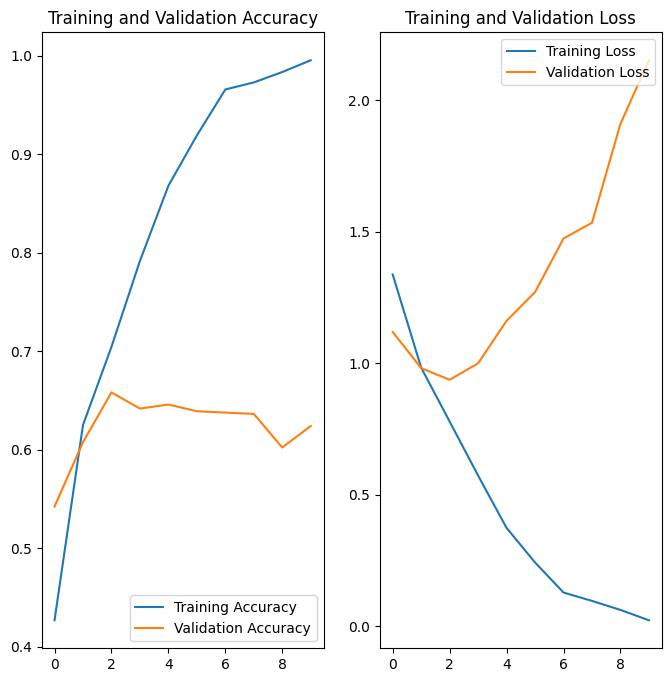

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

プロットには、トレーニングの精度と検証の精度は大幅にずれており、モデルは検証セットで約 60％ の精度しか達成していないことが示されています。

以下のチュートリアルセクションでは、問題の原因を調べ、モデルの全体的なパフォーマンスを向上させる方法を示します。

## 過学習

上記のプロットでは、トレーニングの精度は時間の経過とともに直線的に増加していますが、検証の精度はトレーニングプロセスで約60％のままです。また、トレーニングと検証の精度に大きな違いがあり、これは[過学習](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit)の兆候を示しています。

トレーニングサンプルの数が少ない場合、モデルは、トレーニングサンプルのノイズや不要な詳細から学習し、新しいサンプルでのモデルのパフォーマンスに悪影響を及ぼすことがあります。 この現象は過学習として知られています。 これは、モデルが新しいデータセットで一般化する上で問題があることを意味します。

トレーニングプロセスで過学習を回避する方法は複数あります。このチュートリアルでは、*データ拡張*を使用して、モデルに*ドロップアウト*を追加します。

## データ拡張

過学習は、一般に、トレーニングサンプルの数が少ない場合に発生します。[データ拡張](./data_augmentation.ipynb)は、既存のサンプルに対してランダムな変換を使用してサンプルを拡張することにより、追加のトレーニングデータを生成します。これにより、モデルをデータのより多くの側面でトレーニングし、より一般化することができます。

`tf.keras.layers.RandomFlip`、`tf.keras.layers.RandomRotation`、および `tf.keras.layers.RandomZoom` の前処理レイヤーを使用して、データ拡張を実装します。これらは、他のレイヤーと同様にモデル内に含めて、GPU で実行できます。

In [23]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

同じ画像にデータ拡張を数回適用して、いくつかの拡張されたデータがどのようになるかを視覚化してみましょう。

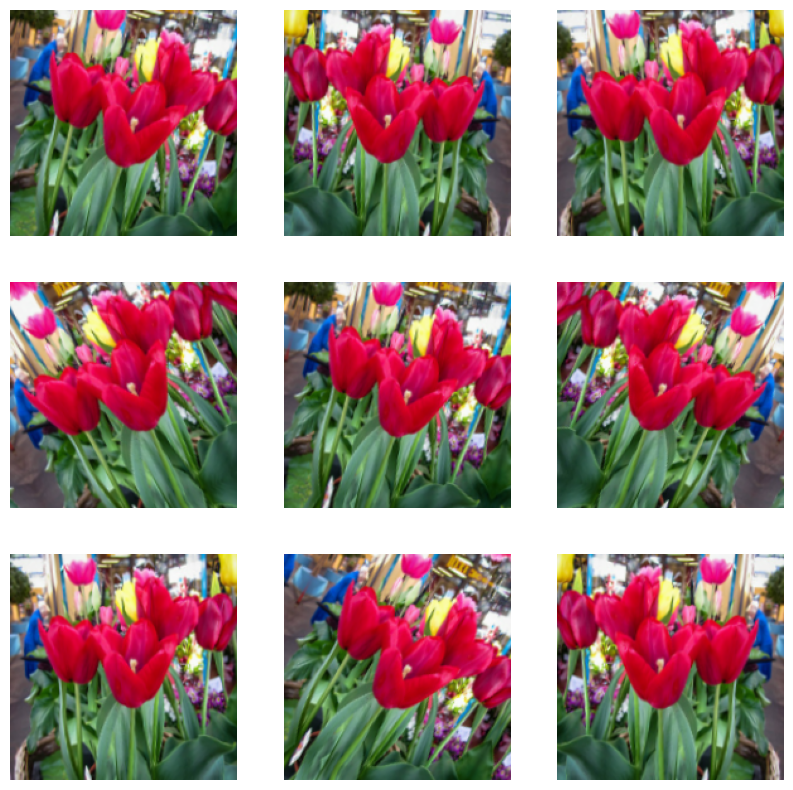

In [24]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

次のステップでトレーニングする前に、モデルにデータ拡張を追加します。

## ドロップアウト

過学習を回避するもう 1 つの方法は、[ドロップアウト](https://developers.google.com/machine-learning/glossary#dropout_regularization){:.external} 正則化をネットワークに導入することです。

ドロップアウトをレイヤーに適用すると、トレーニングプロセス中にレイヤーからいくつかの出力ユニットがランダムにドロップアウトされます（アクティベーションをゼロに設定することにより）。ドロップアウトは、0.1、0.2、0.4 などの形式で、入力値として小数を取ります。これは、適用されたレイヤーから出力ユニットの 10％、20％、または 40％ をランダムにドロップアウトすることを意味します。

拡張された画像を使用してトレーニングする前に、`tf.keras.layers.Dropout` を使用して新しいニューラルネットワークを作成します。

In [25]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## モデルをコンパイルしてトレーニングする

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 sequential_1 (Sequential)   (None, 180, 180, 3)       0         


 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         


 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       


 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         


 g2D)                                                            


 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      


 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         


 g2D)                                                            


 conv2d_5 (Conv2D)           (None, 45, 45, 64)        18496     


 max_pooling2d_5 (MaxPoolin  (None, 22, 22, 64)        0         


 g2D)                                                            


 dropout (Dropout)           (None, 22, 22, 64)        0         


 flatten_1 (Flatten)         (None, 30976)             0         


 dense_2 (Dense)             (None, 128)               3965056   


 outputs (Dense)             (None, 5)                 645       


Total params: 3989285 (15.22 MB)


Trainable params: 3989285 (15.22 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [28]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


2024-01-11 22:29:25.242708: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


 1/92 [..............................] - ETA: 3:36 - loss: 1.6137 - accuracy: 0.2188

 3/92 [..............................] - ETA: 3s - loss: 1.9368 - accuracy: 0.2083  

 5/92 [>.............................] - ETA: 3s - loss: 1.8685 - accuracy: 0.2375

 7/92 [=>............................] - ETA: 3s - loss: 1.8051 - accuracy: 0.2679

 9/92 [=>............................] - ETA: 3s - loss: 1.7449 - accuracy: 0.2847

11/92 [==>...........................] - ETA: 2s - loss: 1.7017 - accuracy: 0.2955

13/92 [===>..........................] - ETA: 2s - loss: 1.6791 - accuracy: 0.2861

15/92 [===>..........................] - ETA: 2s - loss: 1.6580 - accuracy: 0.2896

17/92 [====>.........................] - ETA: 2s - loss: 1.6399 - accuracy: 0.2923

19/92 [=====>........................] - ETA: 2s - loss: 1.6195 - accuracy: 0.3076

21/92 [=====>........................] - ETA: 2s - loss: 1.5923 - accuracy: 0.3155

24/92 [======>.......................] - ETA: 2s - loss: 1.5644 - accuracy: 0.3276

26/92 [=======>......................] - ETA: 1s - loss: 1.5458 - accuracy: 0.3447

28/92 [========>.....................] - ETA: 1s - loss: 1.5349 - accuracy: 0.3502

30/92 [========>.....................] - ETA: 1s - loss: 1.5231 - accuracy: 0.3519

32/92 [=========>....................] - ETA: 1s - loss: 1.5061 - accuracy: 0.3583

34/92 [==========>...................] - ETA: 1s - loss: 1.4910 - accuracy: 0.3620

36/92 [==========>...................] - ETA: 1s - loss: 1.4790 - accuracy: 0.3689

38/92 [===========>..................] - ETA: 1s - loss: 1.4652 - accuracy: 0.3725

40/92 [============>.................] - ETA: 1s - loss: 1.4561 - accuracy: 0.3774

42/92 [============>.................] - ETA: 1s - loss: 1.4381 - accuracy: 0.3862

44/92 [=============>................] - ETA: 1s - loss: 1.4249 - accuracy: 0.3929

46/92 [==============>...............] - ETA: 1s - loss: 1.4114 - accuracy: 0.3975

48/92 [==============>...............] - ETA: 1s - loss: 1.4090 - accuracy: 0.3973

50/92 [===============>..............] - ETA: 1s - loss: 1.3947 - accuracy: 0.4045

52/92 [===============>..............] - ETA: 1s - loss: 1.3924 - accuracy: 0.4076

54/92 [================>.............] - ETA: 1s - loss: 1.3869 - accuracy: 0.4081

56/92 [=================>............] - ETA: 0s - loss: 1.3747 - accuracy: 0.4103

58/92 [=================>............] - ETA: 0s - loss: 1.3648 - accuracy: 0.4140

60/92 [==================>...........] - ETA: 0s - loss: 1.3608 - accuracy: 0.4153

62/92 [===================>..........] - ETA: 0s - loss: 1.3530 - accuracy: 0.4180

64/92 [===================>..........] - ETA: 0s - loss: 1.3481 - accuracy: 0.4221

66/92 [====================>.........] - ETA: 0s - loss: 1.3477 - accuracy: 0.4235

68/92 [=====================>........] - ETA: 0s - loss: 1.3461 - accuracy: 0.4239

70/92 [=====================>........] - ETA: 0s - loss: 1.3389 - accuracy: 0.4265

72/92 [======================>.......] - ETA: 0s - loss: 1.3339 - accuracy: 0.4255

74/92 [=======================>......] - ETA: 0s - loss: 1.3298 - accuracy: 0.4271

76/92 [=======================>......] - ETA: 0s - loss: 1.3248 - accuracy: 0.4299

78/92 [========================>.....] - ETA: 0s - loss: 1.3198 - accuracy: 0.4329

80/92 [=========================>....] - ETA: 0s - loss: 1.3136 - accuracy: 0.4369

82/92 [=========================>....] - ETA: 0s - loss: 1.3081 - accuracy: 0.4396

84/92 [==========================>...] - ETA: 0s - loss: 1.3120 - accuracy: 0.4381

86/92 [===========================>..] - ETA: 0s - loss: 1.3067 - accuracy: 0.4421

88/92 [===========================>..] - ETA: 0s - loss: 1.3037 - accuracy: 0.4437

90/92 [============================>.] - ETA: 0s - loss: 1.2983 - accuracy: 0.4474

92/92 [==============================] - ETA: 0s - loss: 1.2953 - accuracy: 0.4482

92/92 [==============================] - 5s 30ms/step - loss: 1.2953 - accuracy: 0.4482 - val_loss: 1.0794 - val_accuracy: 0.5599


Epoch 2/15


 1/92 [..............................] - ETA: 2s - loss: 1.1189 - accuracy: 0.5000

 3/92 [..............................] - ETA: 2s - loss: 1.0458 - accuracy: 0.5625

 5/92 [>.............................] - ETA: 2s - loss: 1.0818 - accuracy: 0.5000

 7/92 [=>............................] - ETA: 2s - loss: 1.0733 - accuracy: 0.5223

 9/92 [=>............................] - ETA: 2s - loss: 1.0856 - accuracy: 0.5382

11/92 [==>...........................] - ETA: 2s - loss: 1.0957 - accuracy: 0.5369

13/92 [===>..........................] - ETA: 2s - loss: 1.1094 - accuracy: 0.5168

15/92 [===>..........................] - ETA: 1s - loss: 1.1147 - accuracy: 0.5229

17/92 [====>.........................] - ETA: 1s - loss: 1.1137 - accuracy: 0.5257

19/92 [=====>........................] - ETA: 1s - loss: 1.1092 - accuracy: 0.5329

21/92 [=====>........................] - ETA: 1s - loss: 1.1177 - accuracy: 0.5298

23/92 [======>.......................] - ETA: 1s - loss: 1.1249 - accuracy: 0.5217

25/92 [=======>......................] - ETA: 1s - loss: 1.1257 - accuracy: 0.5213

27/92 [=======>......................] - ETA: 1s - loss: 1.1235 - accuracy: 0.5278

29/92 [========>.....................] - ETA: 1s - loss: 1.1119 - accuracy: 0.5366

31/92 [=========>....................] - ETA: 1s - loss: 1.1066 - accuracy: 0.5423

33/92 [=========>....................] - ETA: 1s - loss: 1.0965 - accuracy: 0.5464

35/92 [==========>...................] - ETA: 1s - loss: 1.0897 - accuracy: 0.5527

37/92 [===========>..................] - ETA: 1s - loss: 1.0822 - accuracy: 0.5541

39/92 [===========>..................] - ETA: 1s - loss: 1.0961 - accuracy: 0.5489

41/92 [============>.................] - ETA: 1s - loss: 1.0910 - accuracy: 0.5511

43/92 [=============>................] - ETA: 1s - loss: 1.0900 - accuracy: 0.5552

45/92 [=============>................] - ETA: 1s - loss: 1.0893 - accuracy: 0.5562

47/92 [==============>...............] - ETA: 1s - loss: 1.0878 - accuracy: 0.5565

49/92 [==============>...............] - ETA: 1s - loss: 1.0819 - accuracy: 0.5593

51/92 [===============>..............] - ETA: 1s - loss: 1.0880 - accuracy: 0.5582

53/92 [================>.............] - ETA: 0s - loss: 1.0865 - accuracy: 0.5601

55/92 [================>.............] - ETA: 0s - loss: 1.0828 - accuracy: 0.5597

57/92 [=================>............] - ETA: 0s - loss: 1.0736 - accuracy: 0.5625

59/92 [==================>...........] - ETA: 0s - loss: 1.0742 - accuracy: 0.5614

61/92 [==================>...........] - ETA: 0s - loss: 1.0709 - accuracy: 0.5625

63/92 [===================>..........] - ETA: 0s - loss: 1.0697 - accuracy: 0.5620

65/92 [====================>.........] - ETA: 0s - loss: 1.0625 - accuracy: 0.5644

67/92 [====================>.........] - ETA: 0s - loss: 1.0654 - accuracy: 0.5620

69/92 [=====================>........] - ETA: 0s - loss: 1.0630 - accuracy: 0.5625

71/92 [======================>.......] - ETA: 0s - loss: 1.0666 - accuracy: 0.5612

73/92 [======================>.......] - ETA: 0s - loss: 1.0645 - accuracy: 0.5642

75/92 [=======================>......] - ETA: 0s - loss: 1.0653 - accuracy: 0.5671

77/92 [========================>.....] - ETA: 0s - loss: 1.0617 - accuracy: 0.5674

79/92 [========================>.....] - ETA: 0s - loss: 1.0684 - accuracy: 0.5657

81/92 [=========================>....] - ETA: 0s - loss: 1.0649 - accuracy: 0.5679

84/92 [==========================>...] - ETA: 0s - loss: 1.0620 - accuracy: 0.5701

86/92 [===========================>..] - ETA: 0s - loss: 1.0630 - accuracy: 0.5696

88/92 [===========================>..] - ETA: 0s - loss: 1.0592 - accuracy: 0.5705

90/92 [============================>.] - ETA: 0s - loss: 1.0567 - accuracy: 0.5710

92/92 [==============================] - ETA: 0s - loss: 1.0533 - accuracy: 0.5725

92/92 [==============================] - 3s 28ms/step - loss: 1.0533 - accuracy: 0.5725 - val_loss: 1.0320 - val_accuracy: 0.5886


Epoch 3/15


 1/92 [..............................] - ETA: 2s - loss: 0.8510 - accuracy: 0.6562

 3/92 [..............................] - ETA: 2s - loss: 0.9698 - accuracy: 0.5938

 5/92 [>.............................] - ETA: 2s - loss: 0.9498 - accuracy: 0.6062

 7/92 [=>............................] - ETA: 2s - loss: 0.9095 - accuracy: 0.6339

 9/92 [=>............................] - ETA: 2s - loss: 0.9142 - accuracy: 0.6354

11/92 [==>...........................] - ETA: 2s - loss: 0.9183 - accuracy: 0.6562

14/92 [===>..........................] - ETA: 1s - loss: 0.9173 - accuracy: 0.6386

16/92 [====>.........................] - ETA: 1s - loss: 0.9096 - accuracy: 0.6448

18/92 [====>.........................] - ETA: 1s - loss: 0.9225 - accuracy: 0.6373

20/92 [=====>........................] - ETA: 1s - loss: 0.9351 - accuracy: 0.6282

22/92 [======>.......................] - ETA: 1s - loss: 0.9378 - accuracy: 0.6279

24/92 [======>.......................] - ETA: 1s - loss: 0.9434 - accuracy: 0.6276

26/92 [=======>......................] - ETA: 1s - loss: 0.9366 - accuracy: 0.6250

28/92 [========>.....................] - ETA: 1s - loss: 0.9297 - accuracy: 0.6306

30/92 [========>.....................] - ETA: 1s - loss: 0.9307 - accuracy: 0.6313

32/92 [=========>....................] - ETA: 1s - loss: 0.9311 - accuracy: 0.6309

34/92 [==========>...................] - ETA: 1s - loss: 0.9326 - accuracy: 0.6278

36/92 [==========>...................] - ETA: 1s - loss: 0.9470 - accuracy: 0.6215

38/92 [===========>..................] - ETA: 1s - loss: 0.9591 - accuracy: 0.6159

40/92 [============>.................] - ETA: 1s - loss: 0.9509 - accuracy: 0.6211

42/92 [============>.................] - ETA: 1s - loss: 0.9547 - accuracy: 0.6205

44/92 [=============>................] - ETA: 1s - loss: 0.9604 - accuracy: 0.6193

46/92 [==============>...............] - ETA: 1s - loss: 0.9639 - accuracy: 0.6189

48/92 [==============>...............] - ETA: 1s - loss: 0.9610 - accuracy: 0.6230

50/92 [===============>..............] - ETA: 1s - loss: 0.9695 - accuracy: 0.6187

52/92 [===============>..............] - ETA: 1s - loss: 0.9726 - accuracy: 0.6171

54/92 [================>.............] - ETA: 0s - loss: 0.9740 - accuracy: 0.6169

56/92 [=================>............] - ETA: 0s - loss: 0.9797 - accuracy: 0.6149

58/92 [=================>............] - ETA: 0s - loss: 0.9776 - accuracy: 0.6142

60/92 [==================>...........] - ETA: 0s - loss: 0.9774 - accuracy: 0.6114

62/92 [===================>..........] - ETA: 0s - loss: 0.9723 - accuracy: 0.6118

64/92 [===================>..........] - ETA: 0s - loss: 0.9721 - accuracy: 0.6123

66/92 [====================>.........] - ETA: 0s - loss: 0.9691 - accuracy: 0.6126

68/92 [=====================>........] - ETA: 0s - loss: 0.9689 - accuracy: 0.6107

70/92 [=====================>........] - ETA: 0s - loss: 0.9706 - accuracy: 0.6116

72/92 [======================>.......] - ETA: 0s - loss: 0.9670 - accuracy: 0.6137

74/92 [=======================>......] - ETA: 0s - loss: 0.9635 - accuracy: 0.6148

76/92 [=======================>......] - ETA: 0s - loss: 0.9613 - accuracy: 0.6155

78/92 [========================>.....] - ETA: 0s - loss: 0.9541 - accuracy: 0.6206

80/92 [=========================>....] - ETA: 0s - loss: 0.9568 - accuracy: 0.6207

82/92 [=========================>....] - ETA: 0s - loss: 0.9556 - accuracy: 0.6212

84/92 [==========================>...] - ETA: 0s - loss: 0.9615 - accuracy: 0.6205

86/92 [===========================>..] - ETA: 0s - loss: 0.9623 - accuracy: 0.6195

88/92 [===========================>..] - ETA: 0s - loss: 0.9600 - accuracy: 0.6193

90/92 [============================>.] - ETA: 0s - loss: 0.9587 - accuracy: 0.6205

92/92 [==============================] - ETA: 0s - loss: 0.9596 - accuracy: 0.6209

92/92 [==============================] - 3s 28ms/step - loss: 0.9596 - accuracy: 0.6209 - val_loss: 1.1750 - val_accuracy: 0.5354


Epoch 4/15


 1/92 [..............................] - ETA: 2s - loss: 1.1862 - accuracy: 0.5625

 3/92 [..............................] - ETA: 2s - loss: 0.9889 - accuracy: 0.6250

 5/92 [>.............................] - ETA: 2s - loss: 0.8932 - accuracy: 0.6687

 7/92 [=>............................] - ETA: 2s - loss: 0.9292 - accuracy: 0.6295

 9/92 [=>............................] - ETA: 2s - loss: 0.9196 - accuracy: 0.6250

11/92 [==>...........................] - ETA: 2s - loss: 0.9186 - accuracy: 0.6222

13/92 [===>..........................] - ETA: 2s - loss: 0.9157 - accuracy: 0.6250

15/92 [===>..........................] - ETA: 1s - loss: 0.8970 - accuracy: 0.6375

17/92 [====>.........................] - ETA: 1s - loss: 0.9029 - accuracy: 0.6452

19/92 [=====>........................] - ETA: 1s - loss: 0.8901 - accuracy: 0.6414

21/92 [=====>........................] - ETA: 1s - loss: 0.9129 - accuracy: 0.6324

23/92 [======>.......................] - ETA: 1s - loss: 0.9140 - accuracy: 0.6332

25/92 [=======>......................] - ETA: 1s - loss: 0.9039 - accuracy: 0.6375

27/92 [=======>......................] - ETA: 1s - loss: 0.9015 - accuracy: 0.6389

29/92 [========>.....................] - ETA: 1s - loss: 0.9131 - accuracy: 0.6358

31/92 [=========>....................] - ETA: 1s - loss: 0.9157 - accuracy: 0.6381

33/92 [=========>....................] - ETA: 1s - loss: 0.9239 - accuracy: 0.6364

35/92 [==========>...................] - ETA: 1s - loss: 0.9294 - accuracy: 0.6339

37/92 [===========>..................] - ETA: 1s - loss: 0.9179 - accuracy: 0.6394

39/92 [===========>..................] - ETA: 1s - loss: 0.9148 - accuracy: 0.6418

41/92 [============>.................] - ETA: 1s - loss: 0.9054 - accuracy: 0.6471

43/92 [=============>................] - ETA: 1s - loss: 0.8989 - accuracy: 0.6512

45/92 [=============>................] - ETA: 1s - loss: 0.8984 - accuracy: 0.6542

47/92 [==============>...............] - ETA: 1s - loss: 0.9016 - accuracy: 0.6543

49/92 [==============>...............] - ETA: 1s - loss: 0.8967 - accuracy: 0.6588

52/92 [===============>..............] - ETA: 1s - loss: 0.8994 - accuracy: 0.6546

54/92 [================>.............] - ETA: 0s - loss: 0.9032 - accuracy: 0.6564

56/92 [=================>............] - ETA: 0s - loss: 0.9006 - accuracy: 0.6558

58/92 [=================>............] - ETA: 0s - loss: 0.9021 - accuracy: 0.6553

60/92 [==================>...........] - ETA: 0s - loss: 0.9000 - accuracy: 0.6564

62/92 [===================>..........] - ETA: 0s - loss: 0.9030 - accuracy: 0.6528

64/92 [===================>..........] - ETA: 0s - loss: 0.9023 - accuracy: 0.6539

66/92 [====================>.........] - ETA: 0s - loss: 0.9019 - accuracy: 0.6545

68/92 [=====================>........] - ETA: 0s - loss: 0.8980 - accuracy: 0.6554

70/92 [=====================>........] - ETA: 0s - loss: 0.8956 - accuracy: 0.6568

72/92 [======================>.......] - ETA: 0s - loss: 0.8924 - accuracy: 0.6585

74/92 [=======================>......] - ETA: 0s - loss: 0.8865 - accuracy: 0.6631

76/92 [=======================>......] - ETA: 0s - loss: 0.8847 - accuracy: 0.6646

78/92 [========================>.....] - ETA: 0s - loss: 0.8828 - accuracy: 0.6652

80/92 [=========================>....] - ETA: 0s - loss: 0.8834 - accuracy: 0.6634

82/92 [=========================>....] - ETA: 0s - loss: 0.8830 - accuracy: 0.6640

84/92 [==========================>...] - ETA: 0s - loss: 0.8876 - accuracy: 0.6608

86/92 [===========================>..] - ETA: 0s - loss: 0.8861 - accuracy: 0.6622

88/92 [===========================>..] - ETA: 0s - loss: 0.8855 - accuracy: 0.6635

90/92 [============================>.] - ETA: 0s - loss: 0.8821 - accuracy: 0.6654

92/92 [==============================] - ETA: 0s - loss: 0.8831 - accuracy: 0.6666

92/92 [==============================] - 3s 28ms/step - loss: 0.8831 - accuracy: 0.6666 - val_loss: 0.9653 - val_accuracy: 0.6199


Epoch 5/15


 1/92 [..............................] - ETA: 2s - loss: 0.8101 - accuracy: 0.6562

 3/92 [..............................] - ETA: 2s - loss: 0.7474 - accuracy: 0.7292

 5/92 [>.............................] - ETA: 2s - loss: 0.7801 - accuracy: 0.7000

 7/92 [=>............................] - ETA: 2s - loss: 0.7925 - accuracy: 0.7098

 9/92 [=>............................] - ETA: 2s - loss: 0.7593 - accuracy: 0.7257

11/92 [==>...........................] - ETA: 2s - loss: 0.7614 - accuracy: 0.7188

13/92 [===>..........................] - ETA: 2s - loss: 0.7535 - accuracy: 0.7260

15/92 [===>..........................] - ETA: 1s - loss: 0.7724 - accuracy: 0.7188

17/92 [====>.........................] - ETA: 1s - loss: 0.7857 - accuracy: 0.7151

19/92 [=====>........................] - ETA: 1s - loss: 0.7837 - accuracy: 0.7155

21/92 [=====>........................] - ETA: 1s - loss: 0.8001 - accuracy: 0.7113

23/92 [======>.......................] - ETA: 1s - loss: 0.7971 - accuracy: 0.7106

25/92 [=======>......................] - ETA: 1s - loss: 0.7949 - accuracy: 0.7100

27/92 [=======>......................] - ETA: 1s - loss: 0.8213 - accuracy: 0.6944

29/92 [========>.....................] - ETA: 1s - loss: 0.8233 - accuracy: 0.6940

31/92 [=========>....................] - ETA: 1s - loss: 0.8206 - accuracy: 0.6915

33/92 [=========>....................] - ETA: 1s - loss: 0.8173 - accuracy: 0.6941

35/92 [==========>...................] - ETA: 1s - loss: 0.8243 - accuracy: 0.6911

37/92 [===========>..................] - ETA: 1s - loss: 0.8210 - accuracy: 0.6926

39/92 [===========>..................] - ETA: 1s - loss: 0.8233 - accuracy: 0.6883

41/92 [============>.................] - ETA: 1s - loss: 0.8164 - accuracy: 0.6905

43/92 [=============>................] - ETA: 1s - loss: 0.8133 - accuracy: 0.6919

45/92 [=============>................] - ETA: 1s - loss: 0.8088 - accuracy: 0.6938

47/92 [==============>...............] - ETA: 1s - loss: 0.8048 - accuracy: 0.6915

49/92 [==============>...............] - ETA: 1s - loss: 0.8095 - accuracy: 0.6888

51/92 [===============>..............] - ETA: 1s - loss: 0.8051 - accuracy: 0.6924

53/92 [================>.............] - ETA: 0s - loss: 0.8064 - accuracy: 0.6916

55/92 [================>.............] - ETA: 0s - loss: 0.8045 - accuracy: 0.6903

57/92 [=================>............] - ETA: 0s - loss: 0.8037 - accuracy: 0.6902

59/92 [==================>...........] - ETA: 0s - loss: 0.7968 - accuracy: 0.6923

61/92 [==================>...........] - ETA: 0s - loss: 0.8001 - accuracy: 0.6895

63/92 [===================>..........] - ETA: 0s - loss: 0.7999 - accuracy: 0.6905

65/92 [====================>.........] - ETA: 0s - loss: 0.8015 - accuracy: 0.6885

67/92 [====================>.........] - ETA: 0s - loss: 0.8035 - accuracy: 0.6889

69/92 [=====================>........] - ETA: 0s - loss: 0.8046 - accuracy: 0.6880

71/92 [======================>.......] - ETA: 0s - loss: 0.8006 - accuracy: 0.6901

73/92 [======================>.......] - ETA: 0s - loss: 0.7975 - accuracy: 0.6918

75/92 [=======================>......] - ETA: 0s - loss: 0.7961 - accuracy: 0.6921

78/92 [========================>.....] - ETA: 0s - loss: 0.7964 - accuracy: 0.6917

80/92 [=========================>....] - ETA: 0s - loss: 0.7927 - accuracy: 0.6932

82/92 [=========================>....] - ETA: 0s - loss: 0.7951 - accuracy: 0.6938

84/92 [==========================>...] - ETA: 0s - loss: 0.7946 - accuracy: 0.6951

86/92 [===========================>..] - ETA: 0s - loss: 0.7952 - accuracy: 0.6942

88/92 [===========================>..] - ETA: 0s - loss: 0.7944 - accuracy: 0.6941

90/92 [============================>.] - ETA: 0s - loss: 0.7987 - accuracy: 0.6919

92/92 [==============================] - ETA: 0s - loss: 0.7959 - accuracy: 0.6941

92/92 [==============================] - 3s 28ms/step - loss: 0.7959 - accuracy: 0.6941 - val_loss: 0.8394 - val_accuracy: 0.6662


Epoch 6/15


 1/92 [..............................] - ETA: 2s - loss: 0.7404 - accuracy: 0.6875

 3/92 [..............................] - ETA: 2s - loss: 0.8029 - accuracy: 0.6562

 5/92 [>.............................] - ETA: 2s - loss: 0.8252 - accuracy: 0.6625

 7/92 [=>............................] - ETA: 2s - loss: 0.7709 - accuracy: 0.7009

 9/92 [=>............................] - ETA: 2s - loss: 0.7924 - accuracy: 0.6806

11/92 [==>...........................] - ETA: 2s - loss: 0.7810 - accuracy: 0.6932

13/92 [===>..........................] - ETA: 2s - loss: 0.7899 - accuracy: 0.6923

15/92 [===>..........................] - ETA: 1s - loss: 0.7807 - accuracy: 0.6979

17/92 [====>.........................] - ETA: 1s - loss: 0.7790 - accuracy: 0.6930

19/92 [=====>........................] - ETA: 1s - loss: 0.7638 - accuracy: 0.7039

21/92 [=====>........................] - ETA: 1s - loss: 0.7699 - accuracy: 0.7054

23/92 [======>.......................] - ETA: 1s - loss: 0.7569 - accuracy: 0.7106

25/92 [=======>......................] - ETA: 1s - loss: 0.7699 - accuracy: 0.7063

27/92 [=======>......................] - ETA: 1s - loss: 0.7731 - accuracy: 0.7014

29/92 [========>.....................] - ETA: 1s - loss: 0.7823 - accuracy: 0.6961

31/92 [=========>....................] - ETA: 1s - loss: 0.7964 - accuracy: 0.6865

33/92 [=========>....................] - ETA: 1s - loss: 0.7871 - accuracy: 0.6913

35/92 [==========>...................] - ETA: 1s - loss: 0.7830 - accuracy: 0.6929

37/92 [===========>..................] - ETA: 1s - loss: 0.7811 - accuracy: 0.6959

39/92 [===========>..................] - ETA: 1s - loss: 0.7828 - accuracy: 0.6979

42/92 [============>.................] - ETA: 1s - loss: 0.7797 - accuracy: 0.6969

44/92 [=============>................] - ETA: 1s - loss: 0.7745 - accuracy: 0.6993

46/92 [==============>...............] - ETA: 1s - loss: 0.7788 - accuracy: 0.6988

48/92 [==============>...............] - ETA: 1s - loss: 0.7761 - accuracy: 0.7003

50/92 [===============>..............] - ETA: 1s - loss: 0.7750 - accuracy: 0.6991

52/92 [===============>..............] - ETA: 1s - loss: 0.7725 - accuracy: 0.6993

54/92 [================>.............] - ETA: 0s - loss: 0.7673 - accuracy: 0.7035

56/92 [=================>............] - ETA: 0s - loss: 0.7724 - accuracy: 0.7007

58/92 [=================>............] - ETA: 0s - loss: 0.7669 - accuracy: 0.7029

60/92 [==================>...........] - ETA: 0s - loss: 0.7665 - accuracy: 0.7045

62/92 [===================>..........] - ETA: 0s - loss: 0.7664 - accuracy: 0.7039

64/92 [===================>..........] - ETA: 0s - loss: 0.7658 - accuracy: 0.7025

66/92 [====================>.........] - ETA: 0s - loss: 0.7698 - accuracy: 0.7015

68/92 [=====================>........] - ETA: 0s - loss: 0.7633 - accuracy: 0.7039

70/92 [=====================>........] - ETA: 0s - loss: 0.7607 - accuracy: 0.7056

72/92 [======================>.......] - ETA: 0s - loss: 0.7587 - accuracy: 0.7069

74/92 [=======================>......] - ETA: 0s - loss: 0.7563 - accuracy: 0.7076

76/92 [=======================>......] - ETA: 0s - loss: 0.7591 - accuracy: 0.7046

78/92 [========================>.....] - ETA: 0s - loss: 0.7583 - accuracy: 0.7058

80/92 [=========================>....] - ETA: 0s - loss: 0.7587 - accuracy: 0.7057

82/92 [=========================>....] - ETA: 0s - loss: 0.7554 - accuracy: 0.7072

84/92 [==========================>...] - ETA: 0s - loss: 0.7542 - accuracy: 0.7078

86/92 [===========================>..] - ETA: 0s - loss: 0.7521 - accuracy: 0.7088

88/92 [===========================>..] - ETA: 0s - loss: 0.7526 - accuracy: 0.7101

90/92 [============================>.] - ETA: 0s - loss: 0.7501 - accuracy: 0.7124

92/92 [==============================] - ETA: 0s - loss: 0.7456 - accuracy: 0.7139

92/92 [==============================] - 3s 28ms/step - loss: 0.7456 - accuracy: 0.7139 - val_loss: 0.7961 - val_accuracy: 0.6785


Epoch 7/15


 1/92 [..............................] - ETA: 2s - loss: 0.5487 - accuracy: 0.7812

 3/92 [..............................] - ETA: 2s - loss: 0.6791 - accuracy: 0.7188

 5/92 [>.............................] - ETA: 2s - loss: 0.7443 - accuracy: 0.7125

 7/92 [=>............................] - ETA: 2s - loss: 0.7247 - accuracy: 0.7143

 9/92 [=>............................] - ETA: 2s - loss: 0.6927 - accuracy: 0.7222

11/92 [==>...........................] - ETA: 2s - loss: 0.6521 - accuracy: 0.7386

13/92 [===>..........................] - ETA: 2s - loss: 0.7089 - accuracy: 0.7260

15/92 [===>..........................] - ETA: 1s - loss: 0.7050 - accuracy: 0.7271

17/92 [====>.........................] - ETA: 1s - loss: 0.6893 - accuracy: 0.7390

19/92 [=====>........................] - ETA: 1s - loss: 0.6852 - accuracy: 0.7401

21/92 [=====>........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.7366

23/92 [======>.......................] - ETA: 1s - loss: 0.6933 - accuracy: 0.7405

25/92 [=======>......................] - ETA: 1s - loss: 0.6900 - accuracy: 0.7437

27/92 [=======>......................] - ETA: 1s - loss: 0.6805 - accuracy: 0.7477

29/92 [========>.....................] - ETA: 1s - loss: 0.6851 - accuracy: 0.7468

31/92 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.7450

33/92 [=========>....................] - ETA: 1s - loss: 0.6830 - accuracy: 0.7500

35/92 [==========>...................] - ETA: 1s - loss: 0.6893 - accuracy: 0.7455

37/92 [===========>..................] - ETA: 1s - loss: 0.6972 - accuracy: 0.7441

39/92 [===========>..................] - ETA: 1s - loss: 0.7058 - accuracy: 0.7420

41/92 [============>.................] - ETA: 1s - loss: 0.7151 - accuracy: 0.7386

43/92 [=============>................] - ETA: 1s - loss: 0.7110 - accuracy: 0.7391

45/92 [=============>................] - ETA: 1s - loss: 0.7123 - accuracy: 0.7375

47/92 [==============>...............] - ETA: 1s - loss: 0.7206 - accuracy: 0.7301

50/92 [===============>..............] - ETA: 1s - loss: 0.7212 - accuracy: 0.7293

52/92 [===============>..............] - ETA: 1s - loss: 0.7191 - accuracy: 0.7307

54/92 [================>.............] - ETA: 0s - loss: 0.7214 - accuracy: 0.7297

56/92 [=================>............] - ETA: 0s - loss: 0.7228 - accuracy: 0.7293

58/92 [=================>............] - ETA: 0s - loss: 0.7216 - accuracy: 0.7311

60/92 [==================>...........] - ETA: 0s - loss: 0.7221 - accuracy: 0.7301

62/92 [===================>..........] - ETA: 0s - loss: 0.7169 - accuracy: 0.7328

64/92 [===================>..........] - ETA: 0s - loss: 0.7176 - accuracy: 0.7328

66/92 [====================>.........] - ETA: 0s - loss: 0.7229 - accuracy: 0.7319

68/92 [=====================>........] - ETA: 0s - loss: 0.7184 - accuracy: 0.7325

70/92 [=====================>........] - ETA: 0s - loss: 0.7221 - accuracy: 0.7298

72/92 [======================>.......] - ETA: 0s - loss: 0.7222 - accuracy: 0.7308

74/92 [=======================>......] - ETA: 0s - loss: 0.7265 - accuracy: 0.7288

76/92 [=======================>......] - ETA: 0s - loss: 0.7246 - accuracy: 0.7285

78/92 [========================>.....] - ETA: 0s - loss: 0.7254 - accuracy: 0.7279

80/92 [=========================>....] - ETA: 0s - loss: 0.7238 - accuracy: 0.7281

82/92 [=========================>....] - ETA: 0s - loss: 0.7230 - accuracy: 0.7294

84/92 [==========================>...] - ETA: 0s - loss: 0.7225 - accuracy: 0.7284

86/92 [===========================>..] - ETA: 0s - loss: 0.7232 - accuracy: 0.7270

88/92 [===========================>..] - ETA: 0s - loss: 0.7198 - accuracy: 0.7279

90/92 [============================>.] - ETA: 0s - loss: 0.7199 - accuracy: 0.7288

92/92 [==============================] - ETA: 0s - loss: 0.7215 - accuracy: 0.7282

92/92 [==============================] - 3s 28ms/step - loss: 0.7215 - accuracy: 0.7282 - val_loss: 0.7351 - val_accuracy: 0.7125


Epoch 8/15


 1/92 [..............................] - ETA: 2s - loss: 0.6066 - accuracy: 0.8125

 3/92 [..............................] - ETA: 2s - loss: 0.6443 - accuracy: 0.7500

 5/92 [>.............................] - ETA: 2s - loss: 0.6824 - accuracy: 0.7437

 7/92 [=>............................] - ETA: 2s - loss: 0.6771 - accuracy: 0.7545

 9/92 [=>............................] - ETA: 2s - loss: 0.6845 - accuracy: 0.7396

11/92 [==>...........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.7528

13/92 [===>..........................] - ETA: 2s - loss: 0.6749 - accuracy: 0.7572

15/92 [===>..........................] - ETA: 1s - loss: 0.6899 - accuracy: 0.7500

17/92 [====>.........................] - ETA: 1s - loss: 0.7088 - accuracy: 0.7426

19/92 [=====>........................] - ETA: 1s - loss: 0.7033 - accuracy: 0.7451

21/92 [=====>........................] - ETA: 1s - loss: 0.6995 - accuracy: 0.7515

23/92 [======>.......................] - ETA: 1s - loss: 0.6913 - accuracy: 0.7541

25/92 [=======>......................] - ETA: 1s - loss: 0.6908 - accuracy: 0.7538

27/92 [=======>......................] - ETA: 1s - loss: 0.6861 - accuracy: 0.7512

29/92 [========>.....................] - ETA: 1s - loss: 0.6782 - accuracy: 0.7511

31/92 [=========>....................] - ETA: 1s - loss: 0.6706 - accuracy: 0.7520

34/92 [==========>...................] - ETA: 1s - loss: 0.6631 - accuracy: 0.7546

36/92 [==========>...................] - ETA: 1s - loss: 0.6610 - accuracy: 0.7552

38/92 [===========>..................] - ETA: 1s - loss: 0.6539 - accuracy: 0.7583

40/92 [============>.................] - ETA: 1s - loss: 0.6608 - accuracy: 0.7555

42/92 [============>.................] - ETA: 1s - loss: 0.6535 - accuracy: 0.7582

44/92 [=============>................] - ETA: 1s - loss: 0.6556 - accuracy: 0.7564

46/92 [==============>...............] - ETA: 1s - loss: 0.6674 - accuracy: 0.7548

48/92 [==============>...............] - ETA: 1s - loss: 0.6752 - accuracy: 0.7520

50/92 [===============>..............] - ETA: 1s - loss: 0.6708 - accuracy: 0.7519

52/92 [===============>..............] - ETA: 1s - loss: 0.6709 - accuracy: 0.7530

54/92 [================>.............] - ETA: 0s - loss: 0.6765 - accuracy: 0.7523

56/92 [=================>............] - ETA: 0s - loss: 0.6807 - accuracy: 0.7489

58/92 [=================>............] - ETA: 0s - loss: 0.6760 - accuracy: 0.7495

60/92 [==================>...........] - ETA: 0s - loss: 0.6807 - accuracy: 0.7474

62/92 [===================>..........] - ETA: 0s - loss: 0.6869 - accuracy: 0.7439

64/92 [===================>..........] - ETA: 0s - loss: 0.6852 - accuracy: 0.7466

66/92 [====================>.........] - ETA: 0s - loss: 0.6901 - accuracy: 0.7438

68/92 [=====================>........] - ETA: 0s - loss: 0.6885 - accuracy: 0.7445

70/92 [=====================>........] - ETA: 0s - loss: 0.6835 - accuracy: 0.7464

72/92 [======================>.......] - ETA: 0s - loss: 0.6839 - accuracy: 0.7474

74/92 [=======================>......] - ETA: 0s - loss: 0.6868 - accuracy: 0.7466

76/92 [=======================>......] - ETA: 0s - loss: 0.6819 - accuracy: 0.7483

78/92 [========================>.....] - ETA: 0s - loss: 0.6793 - accuracy: 0.7496

80/92 [=========================>....] - ETA: 0s - loss: 0.6799 - accuracy: 0.7496

82/92 [=========================>....] - ETA: 0s - loss: 0.6791 - accuracy: 0.7508

84/92 [==========================>...] - ETA: 0s - loss: 0.6765 - accuracy: 0.7515

86/92 [===========================>..] - ETA: 0s - loss: 0.6758 - accuracy: 0.7515

88/92 [===========================>..] - ETA: 0s - loss: 0.6799 - accuracy: 0.7486

90/92 [============================>.] - ETA: 0s - loss: 0.6798 - accuracy: 0.7483

92/92 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.7503

92/92 [==============================] - 3s 28ms/step - loss: 0.6774 - accuracy: 0.7503 - val_loss: 0.7764 - val_accuracy: 0.7112


Epoch 9/15


 1/92 [..............................] - ETA: 2s - loss: 0.6825 - accuracy: 0.6562

 3/92 [..............................] - ETA: 2s - loss: 0.6144 - accuracy: 0.7292

 6/92 [>.............................] - ETA: 2s - loss: 0.5952 - accuracy: 0.7663

 8/92 [=>............................] - ETA: 2s - loss: 0.6261 - accuracy: 0.7500

10/92 [==>...........................] - ETA: 2s - loss: 0.6144 - accuracy: 0.7596

12/92 [==>...........................] - ETA: 2s - loss: 0.6084 - accuracy: 0.7500

14/92 [===>..........................] - ETA: 1s - loss: 0.6054 - accuracy: 0.7477

16/92 [====>.........................] - ETA: 1s - loss: 0.6079 - accuracy: 0.7500

18/92 [====>.........................] - ETA: 1s - loss: 0.6079 - accuracy: 0.7588

20/92 [=====>........................] - ETA: 1s - loss: 0.6118 - accuracy: 0.7579

22/92 [======>.......................] - ETA: 1s - loss: 0.6318 - accuracy: 0.7471

24/92 [======>.......................] - ETA: 1s - loss: 0.6200 - accuracy: 0.7539

26/92 [=======>......................] - ETA: 1s - loss: 0.6162 - accuracy: 0.7585

28/92 [========>.....................] - ETA: 1s - loss: 0.6186 - accuracy: 0.7579

30/92 [========>.....................] - ETA: 1s - loss: 0.6132 - accuracy: 0.7616

32/92 [=========>....................] - ETA: 1s - loss: 0.6297 - accuracy: 0.7559

34/92 [==========>...................] - ETA: 1s - loss: 0.6338 - accuracy: 0.7556

36/92 [==========>...................] - ETA: 1s - loss: 0.6278 - accuracy: 0.7570

38/92 [===========>..................] - ETA: 1s - loss: 0.6292 - accuracy: 0.7575

40/92 [============>.................] - ETA: 1s - loss: 0.6348 - accuracy: 0.7555

42/92 [============>.................] - ETA: 1s - loss: 0.6395 - accuracy: 0.7537

44/92 [=============>................] - ETA: 1s - loss: 0.6420 - accuracy: 0.7514

46/92 [==============>...............] - ETA: 1s - loss: 0.6467 - accuracy: 0.7493

48/92 [==============>...............] - ETA: 1s - loss: 0.6469 - accuracy: 0.7480

50/92 [===============>..............] - ETA: 1s - loss: 0.6456 - accuracy: 0.7475

52/92 [===============>..............] - ETA: 1s - loss: 0.6519 - accuracy: 0.7458

54/92 [================>.............] - ETA: 0s - loss: 0.6482 - accuracy: 0.7483

56/92 [=================>............] - ETA: 0s - loss: 0.6452 - accuracy: 0.7500

58/92 [=================>............] - ETA: 0s - loss: 0.6476 - accuracy: 0.7495

60/92 [==================>...........] - ETA: 0s - loss: 0.6551 - accuracy: 0.7442

62/92 [===================>..........] - ETA: 0s - loss: 0.6592 - accuracy: 0.7404

64/92 [===================>..........] - ETA: 0s - loss: 0.6597 - accuracy: 0.7407

66/92 [====================>.........] - ETA: 0s - loss: 0.6584 - accuracy: 0.7424

68/92 [=====================>........] - ETA: 0s - loss: 0.6598 - accuracy: 0.7422

70/92 [=====================>........] - ETA: 0s - loss: 0.6564 - accuracy: 0.7455

72/92 [======================>.......] - ETA: 0s - loss: 0.6559 - accuracy: 0.7456

74/92 [=======================>......] - ETA: 0s - loss: 0.6547 - accuracy: 0.7462

76/92 [=======================>......] - ETA: 0s - loss: 0.6544 - accuracy: 0.7467

78/92 [========================>.....] - ETA: 0s - loss: 0.6600 - accuracy: 0.7448

80/92 [=========================>....] - ETA: 0s - loss: 0.6586 - accuracy: 0.7461

82/92 [=========================>....] - ETA: 0s - loss: 0.6590 - accuracy: 0.7454

84/92 [==========================>...] - ETA: 0s - loss: 0.6554 - accuracy: 0.7463

86/92 [===========================>..] - ETA: 0s - loss: 0.6554 - accuracy: 0.7467

88/92 [===========================>..] - ETA: 0s - loss: 0.6533 - accuracy: 0.7475

90/92 [============================>.] - ETA: 0s - loss: 0.6510 - accuracy: 0.7500

92/92 [==============================] - ETA: 0s - loss: 0.6521 - accuracy: 0.7497

92/92 [==============================] - 3s 28ms/step - loss: 0.6521 - accuracy: 0.7497 - val_loss: 0.7691 - val_accuracy: 0.7016


Epoch 10/15


 1/92 [..............................] - ETA: 2s - loss: 0.5667 - accuracy: 0.7500

 3/92 [..............................] - ETA: 2s - loss: 0.6264 - accuracy: 0.7708

 5/92 [>.............................] - ETA: 2s - loss: 0.6392 - accuracy: 0.7500

 7/92 [=>............................] - ETA: 2s - loss: 0.6450 - accuracy: 0.7411

 9/92 [=>............................] - ETA: 2s - loss: 0.6136 - accuracy: 0.7431

11/92 [==>...........................] - ETA: 2s - loss: 0.6516 - accuracy: 0.7188

13/92 [===>..........................] - ETA: 2s - loss: 0.6241 - accuracy: 0.7380

15/92 [===>..........................] - ETA: 1s - loss: 0.6196 - accuracy: 0.7563

17/92 [====>.........................] - ETA: 1s - loss: 0.6227 - accuracy: 0.7537

19/92 [=====>........................] - ETA: 1s - loss: 0.6112 - accuracy: 0.7582

21/92 [=====>........................] - ETA: 1s - loss: 0.6027 - accuracy: 0.7649

23/92 [======>.......................] - ETA: 1s - loss: 0.6016 - accuracy: 0.7649

25/92 [=======>......................] - ETA: 1s - loss: 0.5883 - accuracy: 0.7675

27/92 [=======>......................] - ETA: 1s - loss: 0.5962 - accuracy: 0.7662

29/92 [========>.....................] - ETA: 1s - loss: 0.5919 - accuracy: 0.7683

31/92 [=========>....................] - ETA: 1s - loss: 0.6038 - accuracy: 0.7661

33/92 [=========>....................] - ETA: 1s - loss: 0.5928 - accuracy: 0.7718

35/92 [==========>...................] - ETA: 1s - loss: 0.5919 - accuracy: 0.7705

37/92 [===========>..................] - ETA: 1s - loss: 0.5987 - accuracy: 0.7686

39/92 [===========>..................] - ETA: 1s - loss: 0.5982 - accuracy: 0.7700

41/92 [============>.................] - ETA: 1s - loss: 0.6034 - accuracy: 0.7668

43/92 [=============>................] - ETA: 1s - loss: 0.6072 - accuracy: 0.7653

45/92 [=============>................] - ETA: 1s - loss: 0.6121 - accuracy: 0.7611

47/92 [==============>...............] - ETA: 1s - loss: 0.6103 - accuracy: 0.7600

50/92 [===============>..............] - ETA: 1s - loss: 0.6084 - accuracy: 0.7607

52/92 [===============>..............] - ETA: 1s - loss: 0.6102 - accuracy: 0.7585

54/92 [================>.............] - ETA: 0s - loss: 0.6129 - accuracy: 0.7587

56/92 [=================>............] - ETA: 0s - loss: 0.6142 - accuracy: 0.7607

58/92 [=================>............] - ETA: 0s - loss: 0.6112 - accuracy: 0.7641

60/92 [==================>...........] - ETA: 0s - loss: 0.6117 - accuracy: 0.7626

62/92 [===================>..........] - ETA: 0s - loss: 0.6170 - accuracy: 0.7601

64/92 [===================>..........] - ETA: 0s - loss: 0.6186 - accuracy: 0.7588

66/92 [====================>.........] - ETA: 0s - loss: 0.6172 - accuracy: 0.7600

68/92 [=====================>........] - ETA: 0s - loss: 0.6210 - accuracy: 0.7583

70/92 [=====================>........] - ETA: 0s - loss: 0.6199 - accuracy: 0.7590

72/92 [======================>.......] - ETA: 0s - loss: 0.6186 - accuracy: 0.7600

74/92 [=======================>......] - ETA: 0s - loss: 0.6151 - accuracy: 0.7623

76/92 [=======================>......] - ETA: 0s - loss: 0.6149 - accuracy: 0.7624

78/92 [========================>.....] - ETA: 0s - loss: 0.6174 - accuracy: 0.7617

80/92 [=========================>....] - ETA: 0s - loss: 0.6170 - accuracy: 0.7633

82/92 [=========================>....] - ETA: 0s - loss: 0.6200 - accuracy: 0.7626

84/92 [==========================>...] - ETA: 0s - loss: 0.6248 - accuracy: 0.7593

86/92 [===========================>..] - ETA: 0s - loss: 0.6247 - accuracy: 0.7595

88/92 [===========================>..] - ETA: 0s - loss: 0.6259 - accuracy: 0.7585

90/92 [============================>.] - ETA: 0s - loss: 0.6269 - accuracy: 0.7580

92/92 [==============================] - ETA: 0s - loss: 0.6263 - accuracy: 0.7589

92/92 [==============================] - 3s 28ms/step - loss: 0.6263 - accuracy: 0.7589 - val_loss: 0.7217 - val_accuracy: 0.7207


Epoch 11/15


 1/92 [..............................] - ETA: 2s - loss: 0.4884 - accuracy: 0.8125

 3/92 [..............................] - ETA: 2s - loss: 0.6194 - accuracy: 0.7500

 5/92 [>.............................] - ETA: 2s - loss: 0.5677 - accuracy: 0.7625

 7/92 [=>............................] - ETA: 2s - loss: 0.5877 - accuracy: 0.7500

 9/92 [=>............................] - ETA: 2s - loss: 0.6015 - accuracy: 0.7465

11/92 [==>...........................] - ETA: 2s - loss: 0.5766 - accuracy: 0.7614

13/92 [===>..........................] - ETA: 2s - loss: 0.5644 - accuracy: 0.7740

15/92 [===>..........................] - ETA: 1s - loss: 0.5531 - accuracy: 0.7812

17/92 [====>.........................] - ETA: 1s - loss: 0.5581 - accuracy: 0.7794

19/92 [=====>........................] - ETA: 1s - loss: 0.5723 - accuracy: 0.7747

21/92 [=====>........................] - ETA: 1s - loss: 0.5595 - accuracy: 0.7812

23/92 [======>.......................] - ETA: 1s - loss: 0.5814 - accuracy: 0.7731

25/92 [=======>......................] - ETA: 1s - loss: 0.5762 - accuracy: 0.7800

27/92 [=======>......................] - ETA: 1s - loss: 0.5858 - accuracy: 0.7778

29/92 [========>.....................] - ETA: 1s - loss: 0.5768 - accuracy: 0.7791

31/92 [=========>....................] - ETA: 1s - loss: 0.5747 - accuracy: 0.7802

33/92 [=========>....................] - ETA: 1s - loss: 0.5711 - accuracy: 0.7812

35/92 [==========>...................] - ETA: 1s - loss: 0.5646 - accuracy: 0.7857

37/92 [===========>..................] - ETA: 1s - loss: 0.5733 - accuracy: 0.7804

39/92 [===========>..................] - ETA: 1s - loss: 0.5778 - accuracy: 0.7796

41/92 [============>.................] - ETA: 1s - loss: 0.5804 - accuracy: 0.7752

43/92 [=============>................] - ETA: 1s - loss: 0.5869 - accuracy: 0.7711

45/92 [=============>................] - ETA: 1s - loss: 0.5922 - accuracy: 0.7694

47/92 [==============>...............] - ETA: 1s - loss: 0.5926 - accuracy: 0.7693

49/92 [==============>...............] - ETA: 1s - loss: 0.5899 - accuracy: 0.7698

51/92 [===============>..............] - ETA: 1s - loss: 0.5863 - accuracy: 0.7708

53/92 [================>.............] - ETA: 1s - loss: 0.5853 - accuracy: 0.7706

55/92 [================>.............] - ETA: 0s - loss: 0.5958 - accuracy: 0.7665

57/92 [=================>............] - ETA: 0s - loss: 0.5923 - accuracy: 0.7697

60/92 [==================>...........] - ETA: 0s - loss: 0.5894 - accuracy: 0.7720

62/92 [===================>..........] - ETA: 0s - loss: 0.5898 - accuracy: 0.7718

64/92 [===================>..........] - ETA: 0s - loss: 0.5944 - accuracy: 0.7701

66/92 [====================>.........] - ETA: 0s - loss: 0.5917 - accuracy: 0.7714

68/92 [=====================>........] - ETA: 0s - loss: 0.5903 - accuracy: 0.7726

70/92 [=====================>........] - ETA: 0s - loss: 0.5916 - accuracy: 0.7724

72/92 [======================>.......] - ETA: 0s - loss: 0.5936 - accuracy: 0.7722

74/92 [=======================>......] - ETA: 0s - loss: 0.5976 - accuracy: 0.7699

76/92 [=======================>......] - ETA: 0s - loss: 0.6020 - accuracy: 0.7669

78/92 [========================>.....] - ETA: 0s - loss: 0.6046 - accuracy: 0.7661

80/92 [=========================>....] - ETA: 0s - loss: 0.6020 - accuracy: 0.7680

82/92 [=========================>....] - ETA: 0s - loss: 0.6044 - accuracy: 0.7657

84/92 [==========================>...] - ETA: 0s - loss: 0.6019 - accuracy: 0.7664

86/92 [===========================>..] - ETA: 0s - loss: 0.6018 - accuracy: 0.7664

88/92 [===========================>..] - ETA: 0s - loss: 0.5982 - accuracy: 0.7678

90/92 [============================>.] - ETA: 0s - loss: 0.5989 - accuracy: 0.7674

92/92 [==============================] - ETA: 0s - loss: 0.5988 - accuracy: 0.7667

92/92 [==============================] - 3s 28ms/step - loss: 0.5988 - accuracy: 0.7667 - val_loss: 0.7587 - val_accuracy: 0.7193


Epoch 12/15


 1/92 [..............................] - ETA: 2s - loss: 0.4071 - accuracy: 0.8438

 3/92 [..............................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7917

 5/92 [>.............................] - ETA: 2s - loss: 0.5160 - accuracy: 0.8062

 7/92 [=>............................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7946

 9/92 [=>............................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7917

11/92 [==>...........................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7869

13/92 [===>..........................] - ETA: 2s - loss: 0.5169 - accuracy: 0.7957

15/92 [===>..........................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7875

17/92 [====>.........................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7849

19/92 [=====>........................] - ETA: 1s - loss: 0.5544 - accuracy: 0.7747

21/92 [=====>........................] - ETA: 1s - loss: 0.5507 - accuracy: 0.7798

23/92 [======>.......................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7840

25/92 [=======>......................] - ETA: 1s - loss: 0.5581 - accuracy: 0.7825

27/92 [=======>......................] - ETA: 1s - loss: 0.5651 - accuracy: 0.7801

29/92 [========>.....................] - ETA: 1s - loss: 0.5687 - accuracy: 0.7834

31/92 [=========>....................] - ETA: 1s - loss: 0.5670 - accuracy: 0.7853

33/92 [=========>....................] - ETA: 1s - loss: 0.5738 - accuracy: 0.7812

35/92 [==========>...................] - ETA: 1s - loss: 0.5790 - accuracy: 0.7821

37/92 [===========>..................] - ETA: 1s - loss: 0.5767 - accuracy: 0.7838

39/92 [===========>..................] - ETA: 1s - loss: 0.5721 - accuracy: 0.7853

41/92 [============>.................] - ETA: 1s - loss: 0.5723 - accuracy: 0.7858

43/92 [=============>................] - ETA: 1s - loss: 0.5671 - accuracy: 0.7856

45/92 [=============>................] - ETA: 1s - loss: 0.5637 - accuracy: 0.7854

47/92 [==============>...............] - ETA: 1s - loss: 0.5573 - accuracy: 0.7899

49/92 [==============>...............] - ETA: 1s - loss: 0.5586 - accuracy: 0.7889

51/92 [===============>..............] - ETA: 1s - loss: 0.5620 - accuracy: 0.7880

53/92 [================>.............] - ETA: 1s - loss: 0.5656 - accuracy: 0.7854

55/92 [================>.............] - ETA: 0s - loss: 0.5700 - accuracy: 0.7847

57/92 [=================>............] - ETA: 0s - loss: 0.5721 - accuracy: 0.7845

60/92 [==================>...........] - ETA: 0s - loss: 0.5743 - accuracy: 0.7840

62/92 [===================>..........] - ETA: 0s - loss: 0.5762 - accuracy: 0.7819

64/92 [===================>..........] - ETA: 0s - loss: 0.5784 - accuracy: 0.7814

66/92 [====================>.........] - ETA: 0s - loss: 0.5747 - accuracy: 0.7823

68/92 [=====================>........] - ETA: 0s - loss: 0.5789 - accuracy: 0.7800

70/92 [=====================>........] - ETA: 0s - loss: 0.5778 - accuracy: 0.7814

72/92 [======================>.......] - ETA: 0s - loss: 0.5770 - accuracy: 0.7814

74/92 [=======================>......] - ETA: 0s - loss: 0.5790 - accuracy: 0.7801

76/92 [=======================>......] - ETA: 0s - loss: 0.5785 - accuracy: 0.7801

78/92 [========================>.....] - ETA: 0s - loss: 0.5798 - accuracy: 0.7793

80/92 [=========================>....] - ETA: 0s - loss: 0.5792 - accuracy: 0.7786

82/92 [=========================>....] - ETA: 0s - loss: 0.5771 - accuracy: 0.7798

84/92 [==========================>...] - ETA: 0s - loss: 0.5812 - accuracy: 0.7757

86/92 [===========================>..] - ETA: 0s - loss: 0.5846 - accuracy: 0.7730

88/92 [===========================>..] - ETA: 0s - loss: 0.5807 - accuracy: 0.7746

90/92 [============================>.] - ETA: 0s - loss: 0.5810 - accuracy: 0.7754

92/92 [==============================] - ETA: 0s - loss: 0.5809 - accuracy: 0.7755

92/92 [==============================] - 3s 28ms/step - loss: 0.5809 - accuracy: 0.7755 - val_loss: 0.6886 - val_accuracy: 0.7466


Epoch 13/15


 1/92 [..............................] - ETA: 2s - loss: 0.5948 - accuracy: 0.8125

 3/92 [..............................] - ETA: 2s - loss: 0.6357 - accuracy: 0.8021

 5/92 [>.............................] - ETA: 2s - loss: 0.5731 - accuracy: 0.8062

 7/92 [=>............................] - ETA: 2s - loss: 0.5449 - accuracy: 0.8125

 9/92 [=>............................] - ETA: 2s - loss: 0.5382 - accuracy: 0.8056

11/92 [==>...........................] - ETA: 2s - loss: 0.5206 - accuracy: 0.8097

13/92 [===>..........................] - ETA: 2s - loss: 0.5152 - accuracy: 0.8125

15/92 [===>..........................] - ETA: 1s - loss: 0.5155 - accuracy: 0.8125

17/92 [====>.........................] - ETA: 1s - loss: 0.5203 - accuracy: 0.8125

19/92 [=====>........................] - ETA: 1s - loss: 0.5184 - accuracy: 0.8125

21/92 [=====>........................] - ETA: 1s - loss: 0.5323 - accuracy: 0.8065

23/92 [======>.......................] - ETA: 1s - loss: 0.5206 - accuracy: 0.8139

25/92 [=======>......................] - ETA: 1s - loss: 0.5286 - accuracy: 0.8100

27/92 [=======>......................] - ETA: 1s - loss: 0.5262 - accuracy: 0.8113

29/92 [========>.....................] - ETA: 1s - loss: 0.5334 - accuracy: 0.8071

31/92 [=========>....................] - ETA: 1s - loss: 0.5299 - accuracy: 0.8054

33/92 [=========>....................] - ETA: 1s - loss: 0.5411 - accuracy: 0.8011

35/92 [==========>...................] - ETA: 1s - loss: 0.5439 - accuracy: 0.8000

37/92 [===========>..................] - ETA: 1s - loss: 0.5516 - accuracy: 0.7965

39/92 [===========>..................] - ETA: 1s - loss: 0.5683 - accuracy: 0.7901

41/92 [============>.................] - ETA: 1s - loss: 0.5800 - accuracy: 0.7851

43/92 [=============>................] - ETA: 1s - loss: 0.5804 - accuracy: 0.7842

45/92 [=============>................] - ETA: 1s - loss: 0.5802 - accuracy: 0.7840

47/92 [==============>...............] - ETA: 1s - loss: 0.5806 - accuracy: 0.7819

50/92 [===============>..............] - ETA: 1s - loss: 0.5772 - accuracy: 0.7852

52/92 [===============>..............] - ETA: 1s - loss: 0.5757 - accuracy: 0.7838

54/92 [================>.............] - ETA: 0s - loss: 0.5748 - accuracy: 0.7849

56/92 [=================>............] - ETA: 0s - loss: 0.5739 - accuracy: 0.7842

58/92 [=================>............] - ETA: 0s - loss: 0.5737 - accuracy: 0.7846

60/92 [==================>...........] - ETA: 0s - loss: 0.5706 - accuracy: 0.7871

62/92 [===================>..........] - ETA: 0s - loss: 0.5695 - accuracy: 0.7885

64/92 [===================>..........] - ETA: 0s - loss: 0.5694 - accuracy: 0.7887

66/92 [====================>.........] - ETA: 0s - loss: 0.5678 - accuracy: 0.7880

68/92 [=====================>........] - ETA: 0s - loss: 0.5685 - accuracy: 0.7878

70/92 [=====================>........] - ETA: 0s - loss: 0.5654 - accuracy: 0.7890

72/92 [======================>.......] - ETA: 0s - loss: 0.5642 - accuracy: 0.7888

74/92 [=======================>......] - ETA: 0s - loss: 0.5657 - accuracy: 0.7877

76/92 [=======================>......] - ETA: 0s - loss: 0.5688 - accuracy: 0.7863

78/92 [========================>.....] - ETA: 0s - loss: 0.5726 - accuracy: 0.7858

80/92 [=========================>....] - ETA: 0s - loss: 0.5759 - accuracy: 0.7853

82/92 [=========================>....] - ETA: 0s - loss: 0.5772 - accuracy: 0.7852

84/92 [==========================>...] - ETA: 0s - loss: 0.5769 - accuracy: 0.7869

86/92 [===========================>..] - ETA: 0s - loss: 0.5769 - accuracy: 0.7864

88/92 [===========================>..] - ETA: 0s - loss: 0.5762 - accuracy: 0.7863

90/92 [============================>.] - ETA: 0s - loss: 0.5745 - accuracy: 0.7873

92/92 [==============================] - ETA: 0s - loss: 0.5736 - accuracy: 0.7875

92/92 [==============================] - 3s 28ms/step - loss: 0.5736 - accuracy: 0.7875 - val_loss: 0.7498 - val_accuracy: 0.7016


Epoch 14/15


 1/92 [..............................] - ETA: 2s - loss: 0.4325 - accuracy: 0.9062

 3/92 [..............................] - ETA: 2s - loss: 0.4428 - accuracy: 0.8542

 5/92 [>.............................] - ETA: 2s - loss: 0.4641 - accuracy: 0.8313

 7/92 [=>............................] - ETA: 2s - loss: 0.4497 - accuracy: 0.8482

 9/92 [=>............................] - ETA: 2s - loss: 0.4844 - accuracy: 0.8368

11/92 [==>...........................] - ETA: 2s - loss: 0.4876 - accuracy: 0.8324

13/92 [===>..........................] - ETA: 2s - loss: 0.4873 - accuracy: 0.8245

15/92 [===>..........................] - ETA: 2s - loss: 0.4998 - accuracy: 0.8146

17/92 [====>.........................] - ETA: 1s - loss: 0.5110 - accuracy: 0.8107

19/92 [=====>........................] - ETA: 1s - loss: 0.5077 - accuracy: 0.8109

21/92 [=====>........................] - ETA: 1s - loss: 0.5026 - accuracy: 0.8170

23/92 [======>.......................] - ETA: 1s - loss: 0.5095 - accuracy: 0.8139

26/92 [=======>......................] - ETA: 1s - loss: 0.5133 - accuracy: 0.8119

28/92 [========>.....................] - ETA: 1s - loss: 0.5049 - accuracy: 0.8131

30/92 [========>.....................] - ETA: 1s - loss: 0.5167 - accuracy: 0.8046

32/92 [=========>....................] - ETA: 1s - loss: 0.5174 - accuracy: 0.8022

34/92 [==========>...................] - ETA: 1s - loss: 0.5106 - accuracy: 0.8046

36/92 [==========>...................] - ETA: 1s - loss: 0.5157 - accuracy: 0.8051

38/92 [===========>..................] - ETA: 1s - loss: 0.5152 - accuracy: 0.8071

40/92 [============>.................] - ETA: 1s - loss: 0.5125 - accuracy: 0.8066

42/92 [============>.................] - ETA: 1s - loss: 0.5244 - accuracy: 0.8009

44/92 [=============>................] - ETA: 1s - loss: 0.5270 - accuracy: 0.8000

46/92 [==============>...............] - ETA: 1s - loss: 0.5263 - accuracy: 0.7985

48/92 [==============>...............] - ETA: 1s - loss: 0.5209 - accuracy: 0.7997

50/92 [===============>..............] - ETA: 1s - loss: 0.5273 - accuracy: 0.7971

52/92 [===============>..............] - ETA: 1s - loss: 0.5248 - accuracy: 0.7989

54/92 [================>.............] - ETA: 0s - loss: 0.5250 - accuracy: 0.7983

56/92 [=================>............] - ETA: 0s - loss: 0.5256 - accuracy: 0.7988

58/92 [=================>............] - ETA: 0s - loss: 0.5312 - accuracy: 0.7944

60/92 [==================>...........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7939

62/92 [===================>..........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7930

64/92 [===================>..........] - ETA: 0s - loss: 0.5364 - accuracy: 0.7936

66/92 [====================>.........] - ETA: 0s - loss: 0.5341 - accuracy: 0.7942

68/92 [=====================>........] - ETA: 0s - loss: 0.5339 - accuracy: 0.7943

70/92 [=====================>........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7935

72/92 [======================>.......] - ETA: 0s - loss: 0.5278 - accuracy: 0.7957

74/92 [=======================>......] - ETA: 0s - loss: 0.5267 - accuracy: 0.7962

76/92 [=======================>......] - ETA: 0s - loss: 0.5286 - accuracy: 0.7941

78/92 [========================>.....] - ETA: 0s - loss: 0.5253 - accuracy: 0.7954

80/92 [=========================>....] - ETA: 0s - loss: 0.5277 - accuracy: 0.7939

82/92 [=========================>....] - ETA: 0s - loss: 0.5290 - accuracy: 0.7920

84/92 [==========================>...] - ETA: 0s - loss: 0.5266 - accuracy: 0.7940

86/92 [===========================>..] - ETA: 0s - loss: 0.5274 - accuracy: 0.7937

88/92 [===========================>..] - ETA: 0s - loss: 0.5303 - accuracy: 0.7924

90/92 [============================>.] - ETA: 0s - loss: 0.5307 - accuracy: 0.7925

92/92 [==============================] - ETA: 0s - loss: 0.5288 - accuracy: 0.7946

92/92 [==============================] - 3s 28ms/step - loss: 0.5288 - accuracy: 0.7946 - val_loss: 0.7045 - val_accuracy: 0.7384


Epoch 15/15


 1/92 [..............................] - ETA: 2s - loss: 0.9319 - accuracy: 0.6562

 3/92 [..............................] - ETA: 2s - loss: 0.6788 - accuracy: 0.7396

 5/92 [>.............................] - ETA: 2s - loss: 0.6560 - accuracy: 0.7312

 7/92 [=>............................] - ETA: 2s - loss: 0.6081 - accuracy: 0.7634

 9/92 [=>............................] - ETA: 2s - loss: 0.5844 - accuracy: 0.7778

11/92 [==>...........................] - ETA: 2s - loss: 0.5482 - accuracy: 0.7926

13/92 [===>..........................] - ETA: 2s - loss: 0.5547 - accuracy: 0.7909

15/92 [===>..........................] - ETA: 1s - loss: 0.5521 - accuracy: 0.7958

17/92 [====>.........................] - ETA: 1s - loss: 0.5440 - accuracy: 0.7941

19/92 [=====>........................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7944

21/92 [=====>........................] - ETA: 1s - loss: 0.5300 - accuracy: 0.7976

23/92 [======>.......................] - ETA: 1s - loss: 0.5143 - accuracy: 0.8043

25/92 [=======>......................] - ETA: 1s - loss: 0.5104 - accuracy: 0.8062

27/92 [=======>......................] - ETA: 1s - loss: 0.5119 - accuracy: 0.8044

29/92 [========>.....................] - ETA: 1s - loss: 0.5086 - accuracy: 0.8071

31/92 [=========>....................] - ETA: 1s - loss: 0.5065 - accuracy: 0.8125

33/92 [=========>....................] - ETA: 1s - loss: 0.5143 - accuracy: 0.8068

35/92 [==========>...................] - ETA: 1s - loss: 0.5113 - accuracy: 0.8071

37/92 [===========>..................] - ETA: 1s - loss: 0.5040 - accuracy: 0.8117

39/92 [===========>..................] - ETA: 1s - loss: 0.5095 - accuracy: 0.8069

41/92 [============>.................] - ETA: 1s - loss: 0.5078 - accuracy: 0.8095

43/92 [=============>................] - ETA: 1s - loss: 0.5173 - accuracy: 0.8031

45/92 [=============>................] - ETA: 1s - loss: 0.5200 - accuracy: 0.8007

47/92 [==============>...............] - ETA: 1s - loss: 0.5190 - accuracy: 0.7992

49/92 [==============>...............] - ETA: 1s - loss: 0.5217 - accuracy: 0.7991

51/92 [===============>..............] - ETA: 1s - loss: 0.5256 - accuracy: 0.7978

53/92 [================>.............] - ETA: 1s - loss: 0.5279 - accuracy: 0.7966

55/92 [================>.............] - ETA: 0s - loss: 0.5333 - accuracy: 0.7926

57/92 [=================>............] - ETA: 0s - loss: 0.5297 - accuracy: 0.7917

59/92 [==================>...........] - ETA: 0s - loss: 0.5285 - accuracy: 0.7918

61/92 [==================>...........] - ETA: 0s - loss: 0.5280 - accuracy: 0.7920

63/92 [===================>..........] - ETA: 0s - loss: 0.5276 - accuracy: 0.7922

65/92 [====================>.........] - ETA: 0s - loss: 0.5221 - accuracy: 0.7942

67/92 [====================>.........] - ETA: 0s - loss: 0.5232 - accuracy: 0.7934

69/92 [=====================>........] - ETA: 0s - loss: 0.5199 - accuracy: 0.7953

72/92 [======================>.......] - ETA: 0s - loss: 0.5195 - accuracy: 0.7953

74/92 [=======================>......] - ETA: 0s - loss: 0.5244 - accuracy: 0.7924

76/92 [=======================>......] - ETA: 0s - loss: 0.5249 - accuracy: 0.7925

78/92 [========================>.....] - ETA: 0s - loss: 0.5222 - accuracy: 0.7938

80/92 [=========================>....] - ETA: 0s - loss: 0.5206 - accuracy: 0.7943

82/92 [=========================>....] - ETA: 0s - loss: 0.5246 - accuracy: 0.7928

84/92 [==========================>...] - ETA: 0s - loss: 0.5224 - accuracy: 0.7940

86/92 [===========================>..] - ETA: 0s - loss: 0.5268 - accuracy: 0.7948

88/92 [===========================>..] - ETA: 0s - loss: 0.5251 - accuracy: 0.7949

90/92 [============================>.] - ETA: 0s - loss: 0.5231 - accuracy: 0.7949

92/92 [==============================] - ETA: 0s - loss: 0.5288 - accuracy: 0.7922

92/92 [==============================] - 3s 28ms/step - loss: 0.5288 - accuracy: 0.7922 - val_loss: 0.7115 - val_accuracy: 0.7330


## トレーニングの結果を視覚化する

データ拡張と `tf.keras.layers.Dropout` を適用した後は、以前よりも過学習が少なくなり、トレーニングと検証がより高精度に調整されます。

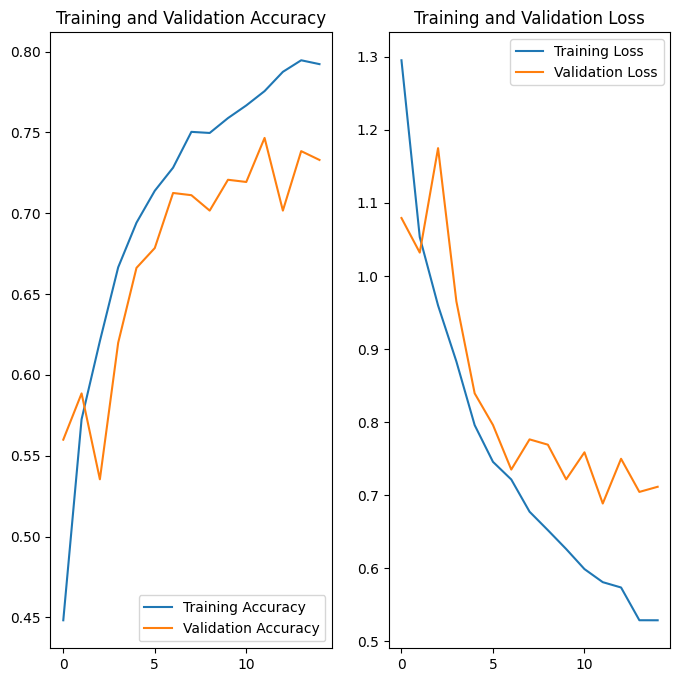

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 新しいデータを予測する

モデルを使用して、トレーニングセットまたは検証セットに含まれていなかった画像を分類します。

注意: データ拡張レイヤーとドロップアウトレイヤーは、推論時に非アクティブになります。

In [30]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

  8192/117948 [=>............................] - ETA: 0s

117948/117948 [==============================] - 0s 0us/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 270ms/step


This image most likely belongs to sunflowers with a 98.38 percent confidence.


## TensorFlow Lite を使用する

TensorFlow Lite は、オンデバイスの機械学習を可能にする一連のツールで、開発者がモバイルデバイス、組み込みデバイス、エッジデバイスでモデルを実行できるようにします。

### Keras Sequential モデルを TensorFlow Lite モデルに変換する

トレーニング済みのモデルをオンデバイスのアプリケーションで使用するには、まず [TensorFlow Lite](https://www.tensorflow.org/lite/) モデルと呼ばれる、より小さく効率的なモデル形式に[変換](https://www.tensorflow.org/lite/models/convert)します。

この例では、トレーニング済みの Keras Sequential モデルを取得し、`tf.lite.TFLiteConverter.from_keras_model` を使用して [TensorFlow Lite](https://www.tensorflow.org/lite/) モデルを生成します。

In [31]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmpfs/tmp/tmpgfjhdzpd/assets


INFO:tensorflow:Assets written to: /tmpfs/tmp/tmpgfjhdzpd/assets


2024-01-11 22:30:08.730272: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-01-11 22:30:08.730316: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 11, Total Ops 23, % non-converted = 47.83 %
 * 11 ARITH ops

- arith.constant:   11 occurrences  (f32: 10, i32: 1)



  (f32: 3)
  (f32: 2)
  (f32: 3)
  (f32: 1)


前のステップで保存した TensorFlow Lite モデルには、複数の関数シグネチャを含めることができます。Keras モデルコンバーター API は、デフォルトのシグネチャを自動的に使用します。詳細は [TensorFlow Lite シグネチャ](https://www.tensorflow.org/lite/guide/signatures)を参照してください。

### TensorFlow Lite モデルを実行する

`tf.lite.Interpreter` クラスを介して、Python で TensorFlow Lite の保存されたモデルシグネチャにアクセスできます。

`Interpreter` を使用してモデルを読み込みます。

In [32]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

変換されたモデルからシグネチャを出力して、入力 (および出力) の名前を取得します。


In [33]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_1_input'], 'outputs': ['outputs']}}

この例では、`serving_default` という名前のデフォルトシグネチャが 1 つあります。さらに、`'inputs'` の名前は `'sequential_1_input'` であり、`'outputs'` の名前は `'outputs'` です。このチュートリアルで前に示したように、`Model.summary` を実行すると、これらの最初と最後の Keras レイヤー名を検索できます。

次のようにシグネチャ名を渡すことで、`tf.lite.Interpreter.get_signature_runner` を使用してサンプル画像で推論を実行し、読み込まれた TensorFlow モデルをテストできます。

In [34]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

チュートリアルの前半で行ったように、TensorFlow Lite モデルを使用して、トレーニングセットまたは検証セットに含まれていない画像を分類できます。

画像は既にテンソル化され、`img_array` として保存されています。次に、読み込まれた TensorFlow Lite モデル （`predictions_lite`）の最初の引数 （`'inputs'` の名前）に渡し、ソフトマックス活性化を計算し、計算された確率が最も高いクラスの予測を出力します。

In [35]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [36]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to sunflowers with a 98.38 percent confidence.


Lite モデルが生成した予測は、元のモデルが生成した予測とほぼ同一になります。

In [37]:
print(np.max(np.abs(predictions - predictions_lite)))

1.1920929e-06


モデルは画像が 5 つのクラス、`'daisy'`、`'dandelion'`、`'roses'`、`'sunflowers'`、および `'tulips'` のうちヒマワリに属すると予測する必要があります。これは TensorFlow Lite 変換前と同じ結果です。


## 次のステップ

このチュートリアルでは、画像分類用のモデルをトレーニングしてテストし、オンデバイスのアプリケーション（画像分類アプリケーションなど）用の TensorFlow Lite 形式に変換し、Python API を使用して TensorFlow Lite モデルで推論を実行する方法を示しました。

TensorFlow Lite についての詳細は、[チュートリアル](https://www.tensorflow.org/lite/tutorials)と[ガイド](https://www.tensorflow.org/lite/guide)を参照してください。